# Predicting Loan Defaults with HCDR Dataset

## Group No. 3 
#### Phase 2

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data
 

# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
!pip install kaggle

In [2]:
!pwd


/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2


In [3]:
!pwd

/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2


In [4]:
!ls -l  ~/.kaggle/kaggle.json

-rw------- 1 root root 67 Nov 15 01:06 /root/.kaggle/kaggle.json


In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
application_test.csv                 25MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




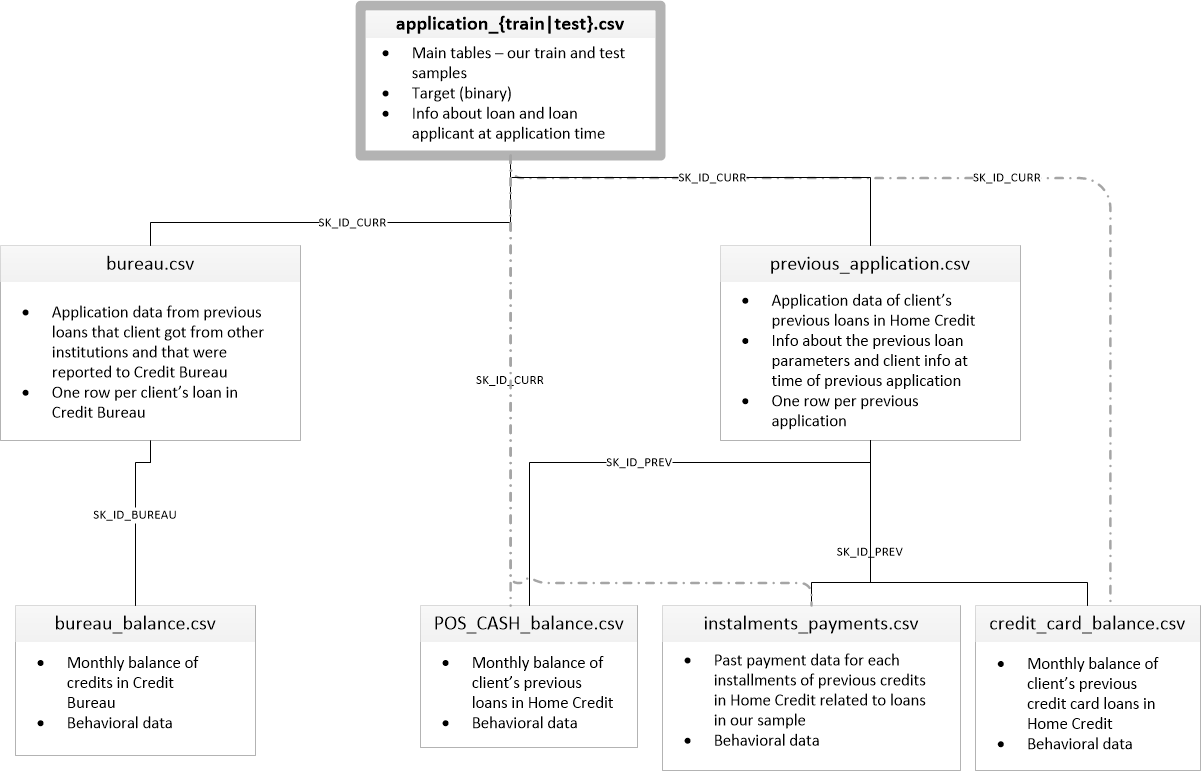

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [7]:
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir DATA_DIR

mkdir: cannot create directory ‘DATA_DIR’: File exists


In [8]:
!ls -l DATA_DIR

total 2701204
-rw-r--r-- 1 root root     37383 Nov 15 01:09 HomeCredit_columns_description.csv
-rw-r--r-- 1 root root 392703158 Nov 15 01:10 POS_CASH_balance.csv
-rw-r--r-- 1 root root  26567651 Nov 15 01:10 application_test.csv
-rw-r--r-- 1 root root 166133370 Nov 15 01:10 application_train.csv
-rw-r--r-- 1 root root 170016717 Nov 15 01:11 bureau.csv
-rw-r--r-- 1 root root 375592889 Nov 15 01:11 bureau_balance.csv
-rw-r--r-- 1 root root 424582605 Nov 15 01:12 credit_card_balance.csv
-rw-r--r-- 1 root root 723118349 Nov 15 01:14 installments_payments.csv
-rw-r--r-- 1 root root 404973293 Nov 15 01:14 previous_application.csv
-rw-r--r-- 1 root root    536202 Nov 15 01:14 sample_submission.csv


In [9]:
!kaggle competitions download home-credit-default-risk -p $DATA_DIR --force

 23%|█████████                               | 155M/688M [00:27<01:53, 4.92MB/s]^C
 23%|█████████                               | 155M/688M [00:27<01:34, 5.94MB/s]
User cancelled operation


In [10]:
!pwd

/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2


In [11]:
!ls -l $DATA_DIR

total 164864
-rw-r--r-- 1 root root 162529280 Nov 15 04:08 home-credit-default-risk.zip


In [12]:
#!rm -r  DATA_DIR

### Imports

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [43]:
unzippingReq = True #True
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile(f'{DATA_DIR}/home-credit-default-risk.zip', 'r')
    # extractall():  Extract all members from the archive to the current working directory. path specifies a different directory to extract to
    zip_ref.extractall('DATA_DIR') 
    zip_ref.close()


## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

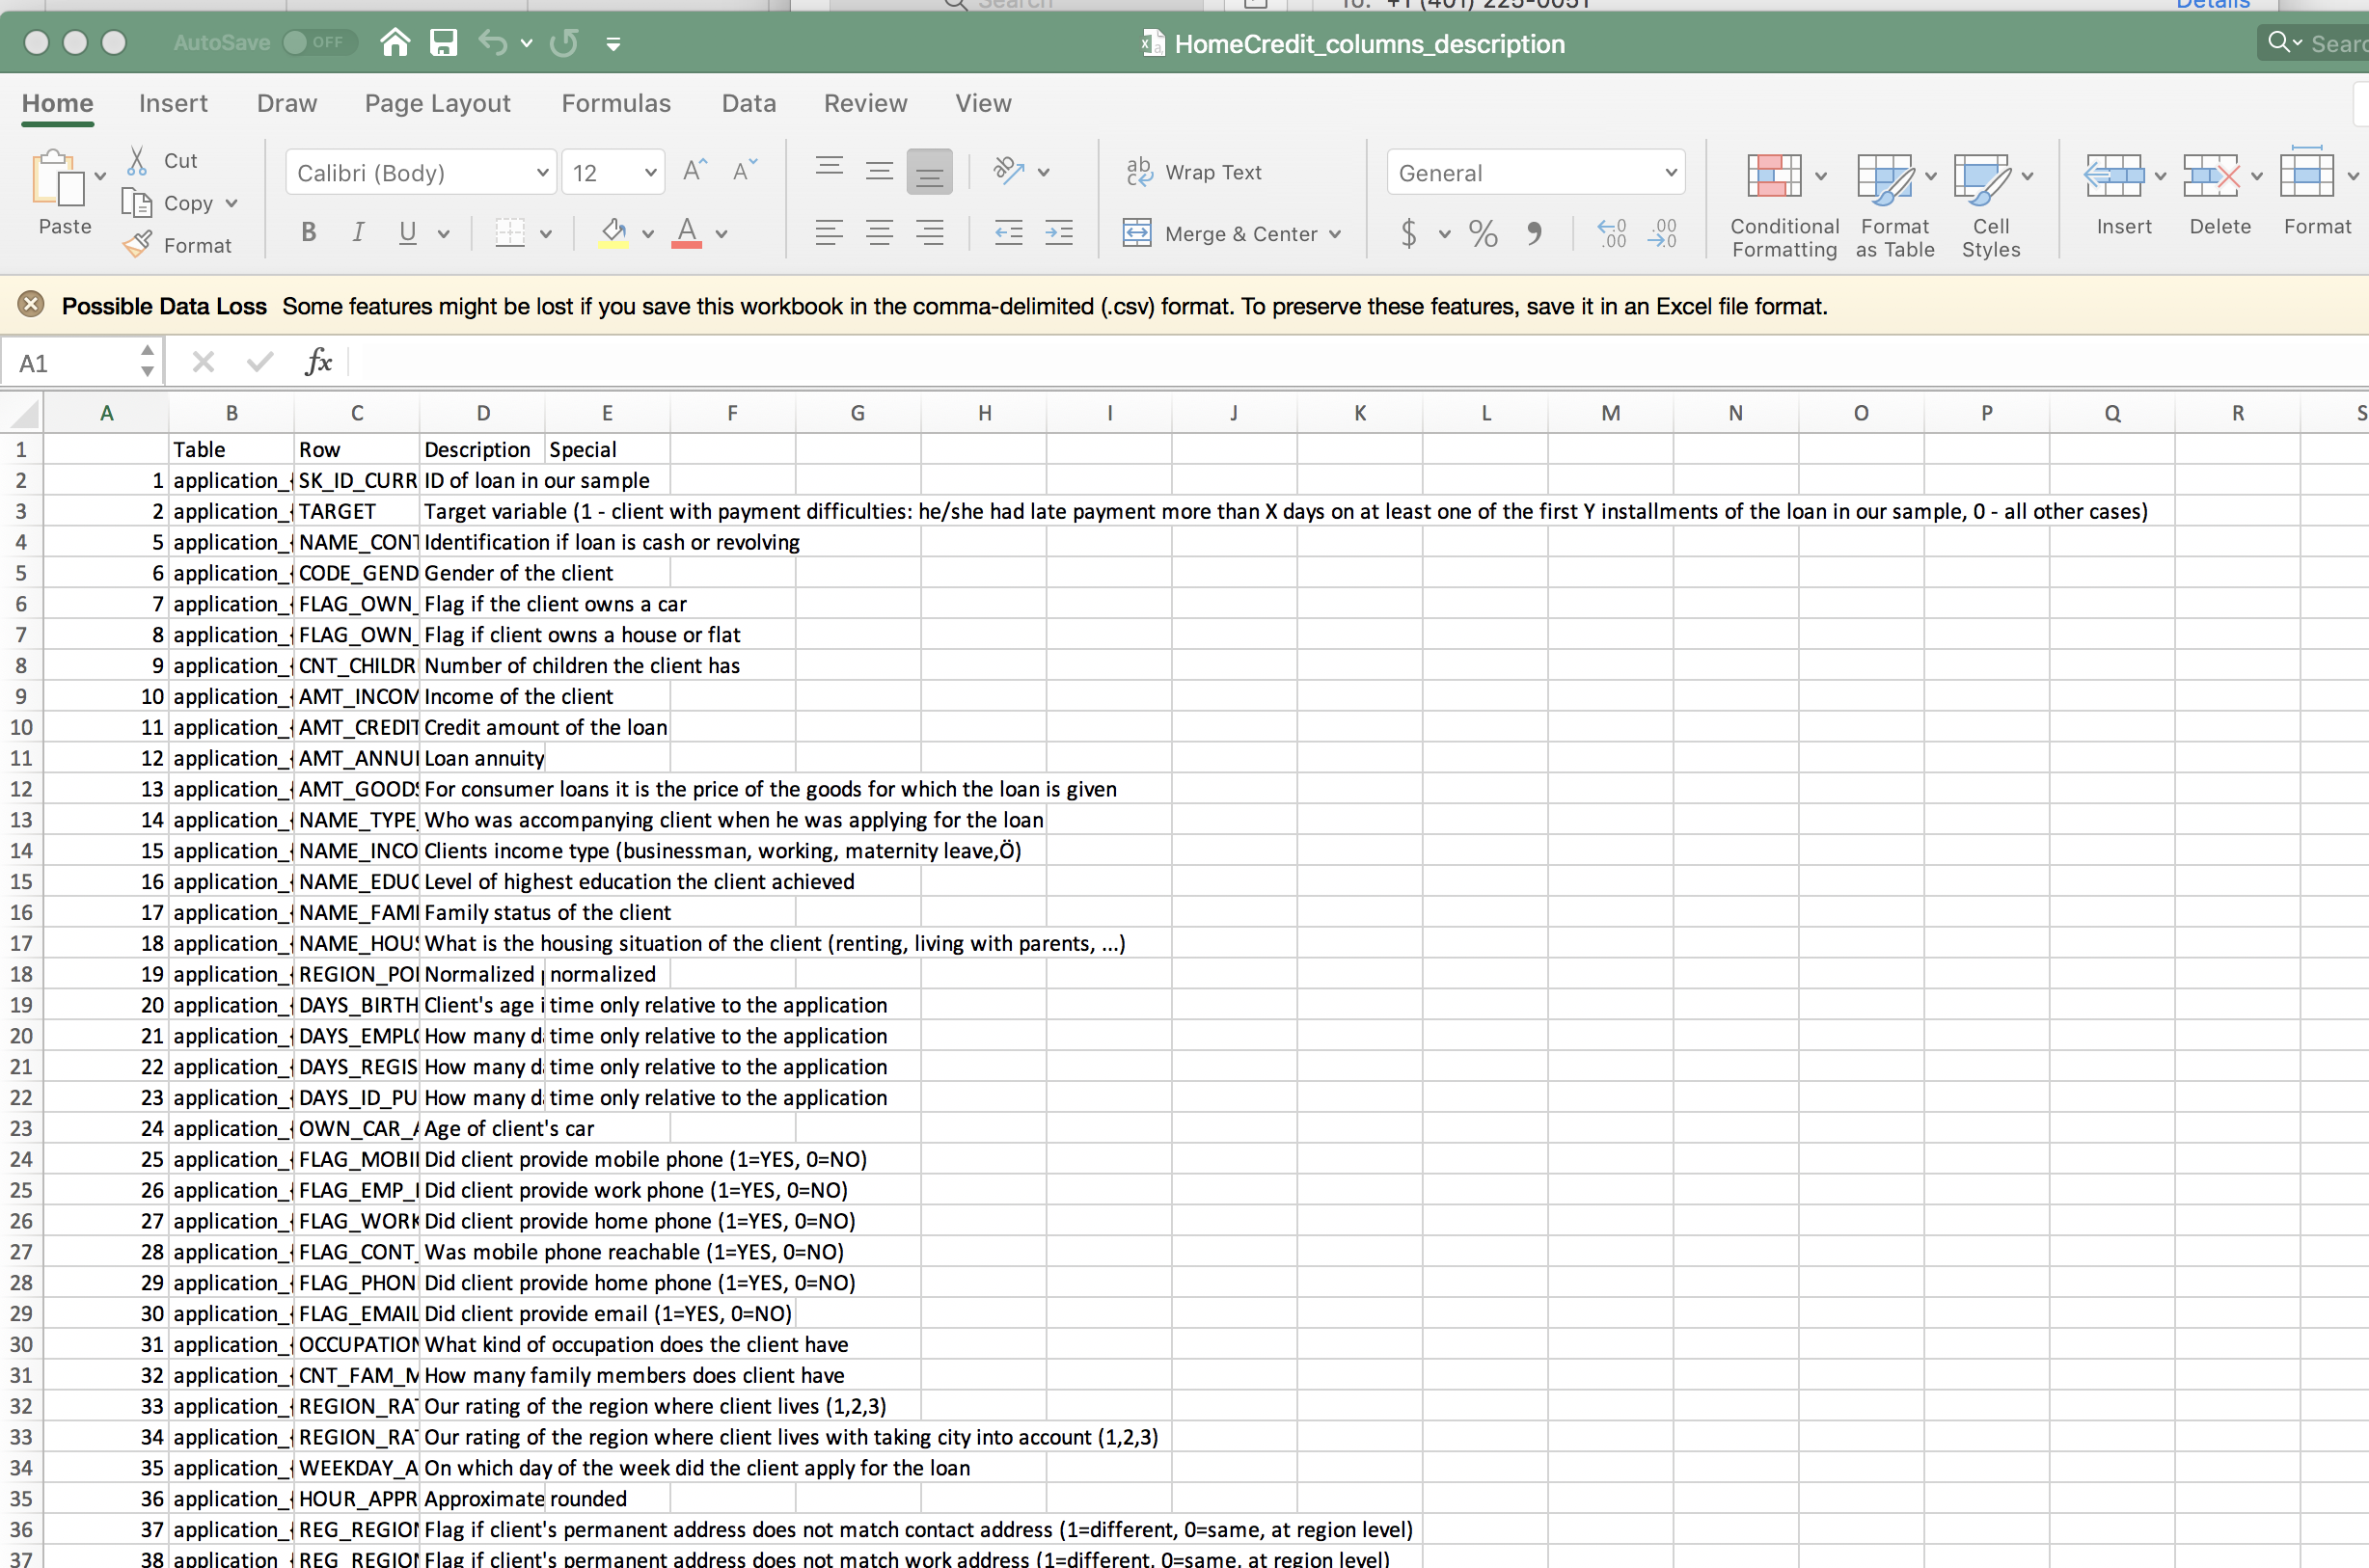

### Application train

In [15]:
ls -l /root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2/DATA_DIR/application_train.csv

-rw-r--r-- 1 root root 166133370 Nov 15 01:10 /root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2/DATA_DIR/application_train.csv


In [16]:
!pwd

/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2


In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
DATA_DIR='/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2/DATA_DIR/'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

In [2]:
DATA_DIR

'/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2/DATA_DIR/'

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [3]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [4]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 21 s, sys: 15 s, total: 36.1 s
Wall time: 2min 24s


In [5]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis
Exploratory data analysis, which is typically pretty substantial, is the process of doing particularly initial study on data to specifically discover patterns, basically extract meaningful insights, convert the raw data into information, spot abnormalities, particularly identify outliers, etc. utilizing statistical and graphical tools. It is always preferable to first fully comprehend the data before working with it, which is very important.


## Summary of Application train

In [6]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [8]:
datasets["application_test"].describe() #numerical only features

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [9]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

Contrary to common assumption, we have essentially described the data here in order to grasp it holistically and for all intents and purposes better. The data's mean, standard deviation, minimum and maximum values, etc., have all been extensively documented.

In [10]:
app_train = datasets["application_train"]
app_test = datasets["application_test"]

###  Encoding categorical values using Label Encoder and get_dummies(df)

In [10]:
# # Create a label encoder object
# label_enc = LabelEncoder()
# label_count = 0

# # app_train = datasets["application_train"]
# # app_test = datasets["application_test"]

# # Iterate through the columns
# for col in app_train:
#     if app_train[col].dtype == 'object':
#         # If 2 or fewer unique categories
#         if len(list(app_train[col].unique())) <= 2:
#             # Train on the training data
#             label_enc.fit(app_train[col])
#             # Transform both training and testing data
#             app_train[col] = label_enc.transform(app_train[col])
#             app_test[col] = label_enc.transform(app_test[col])
            
#             # Keep track of how many columns were label encoded
#             label_count += 1
            
# print('%d columns were label encoded.' % label_count)

3 columns were label encoded.


#### One-Hot Encoding

In [11]:
# app_train = pd.get_dummies(app_train)
# app_test = pd.get_dummies(app_test)

# print('Training Features shape: ', app_train.shape)
# print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [12]:
# train_labels = app_train['TARGET']

# # Align the training and testing data, keep only columns present in both dataframes
# app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# # Add the target back in
# app_train['TARGET'] = train_labels

# print('Training Features shape: ', app_train.shape)
# print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Missing data for application train

In [9]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
LIVINGAPARTMENTS_MEDI       68.35               210199
FLOORSMIN_AVG               67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_MEDI              67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_MODE            66.50               204488
YEARS_BUILD_AVG             66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MEDI               59.38               182590
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590

In [10]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
COMMONAREA_MEDI             68.72               33495
NONLIVINGAPARTMENTS_AVG     68.41               33347
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_AVG               66.61               32466
FLOORSMIN_MODE              66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_AVG             65.28               31818
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
LANDAREA_MEDI               57.96               28254
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254

For all intents and purposes, missing values for each characteristic are generally for all means and purposes notably noticed in a really quite substantial way. As a result, we can clearly see that for the aforementioned qualities, often more than 50% of the values are missing, which is for all intents and purposes quite important in a subtle sense.

## Distribution of the target column 

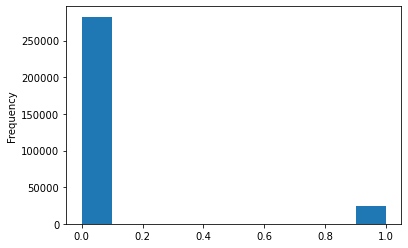

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

datasets["application_train"]['TARGET'].astype(int).plot.hist();

Here we really are examining the distribution of the target column in a subtle way.
We basically actually have two values in this column:, which really is fairly significant.

0: Indicates that the loan was repaid on time. I.e SUCCESSFUL!

1: Indicates that the loan was not repaid on time or the borrower had difficulties in paying back the loan at the decided time.  I.e FAILED.

Here we can literally see that in our data the number of people who can mostly repay their loan on time for all intents and purposes are kind of much more than the ones who fail to, which basically is quite significant.


## Correlation with  the target column 

In [16]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [17]:
corr1 = datasets["application_train"].corr()

<AxesSubplot:>

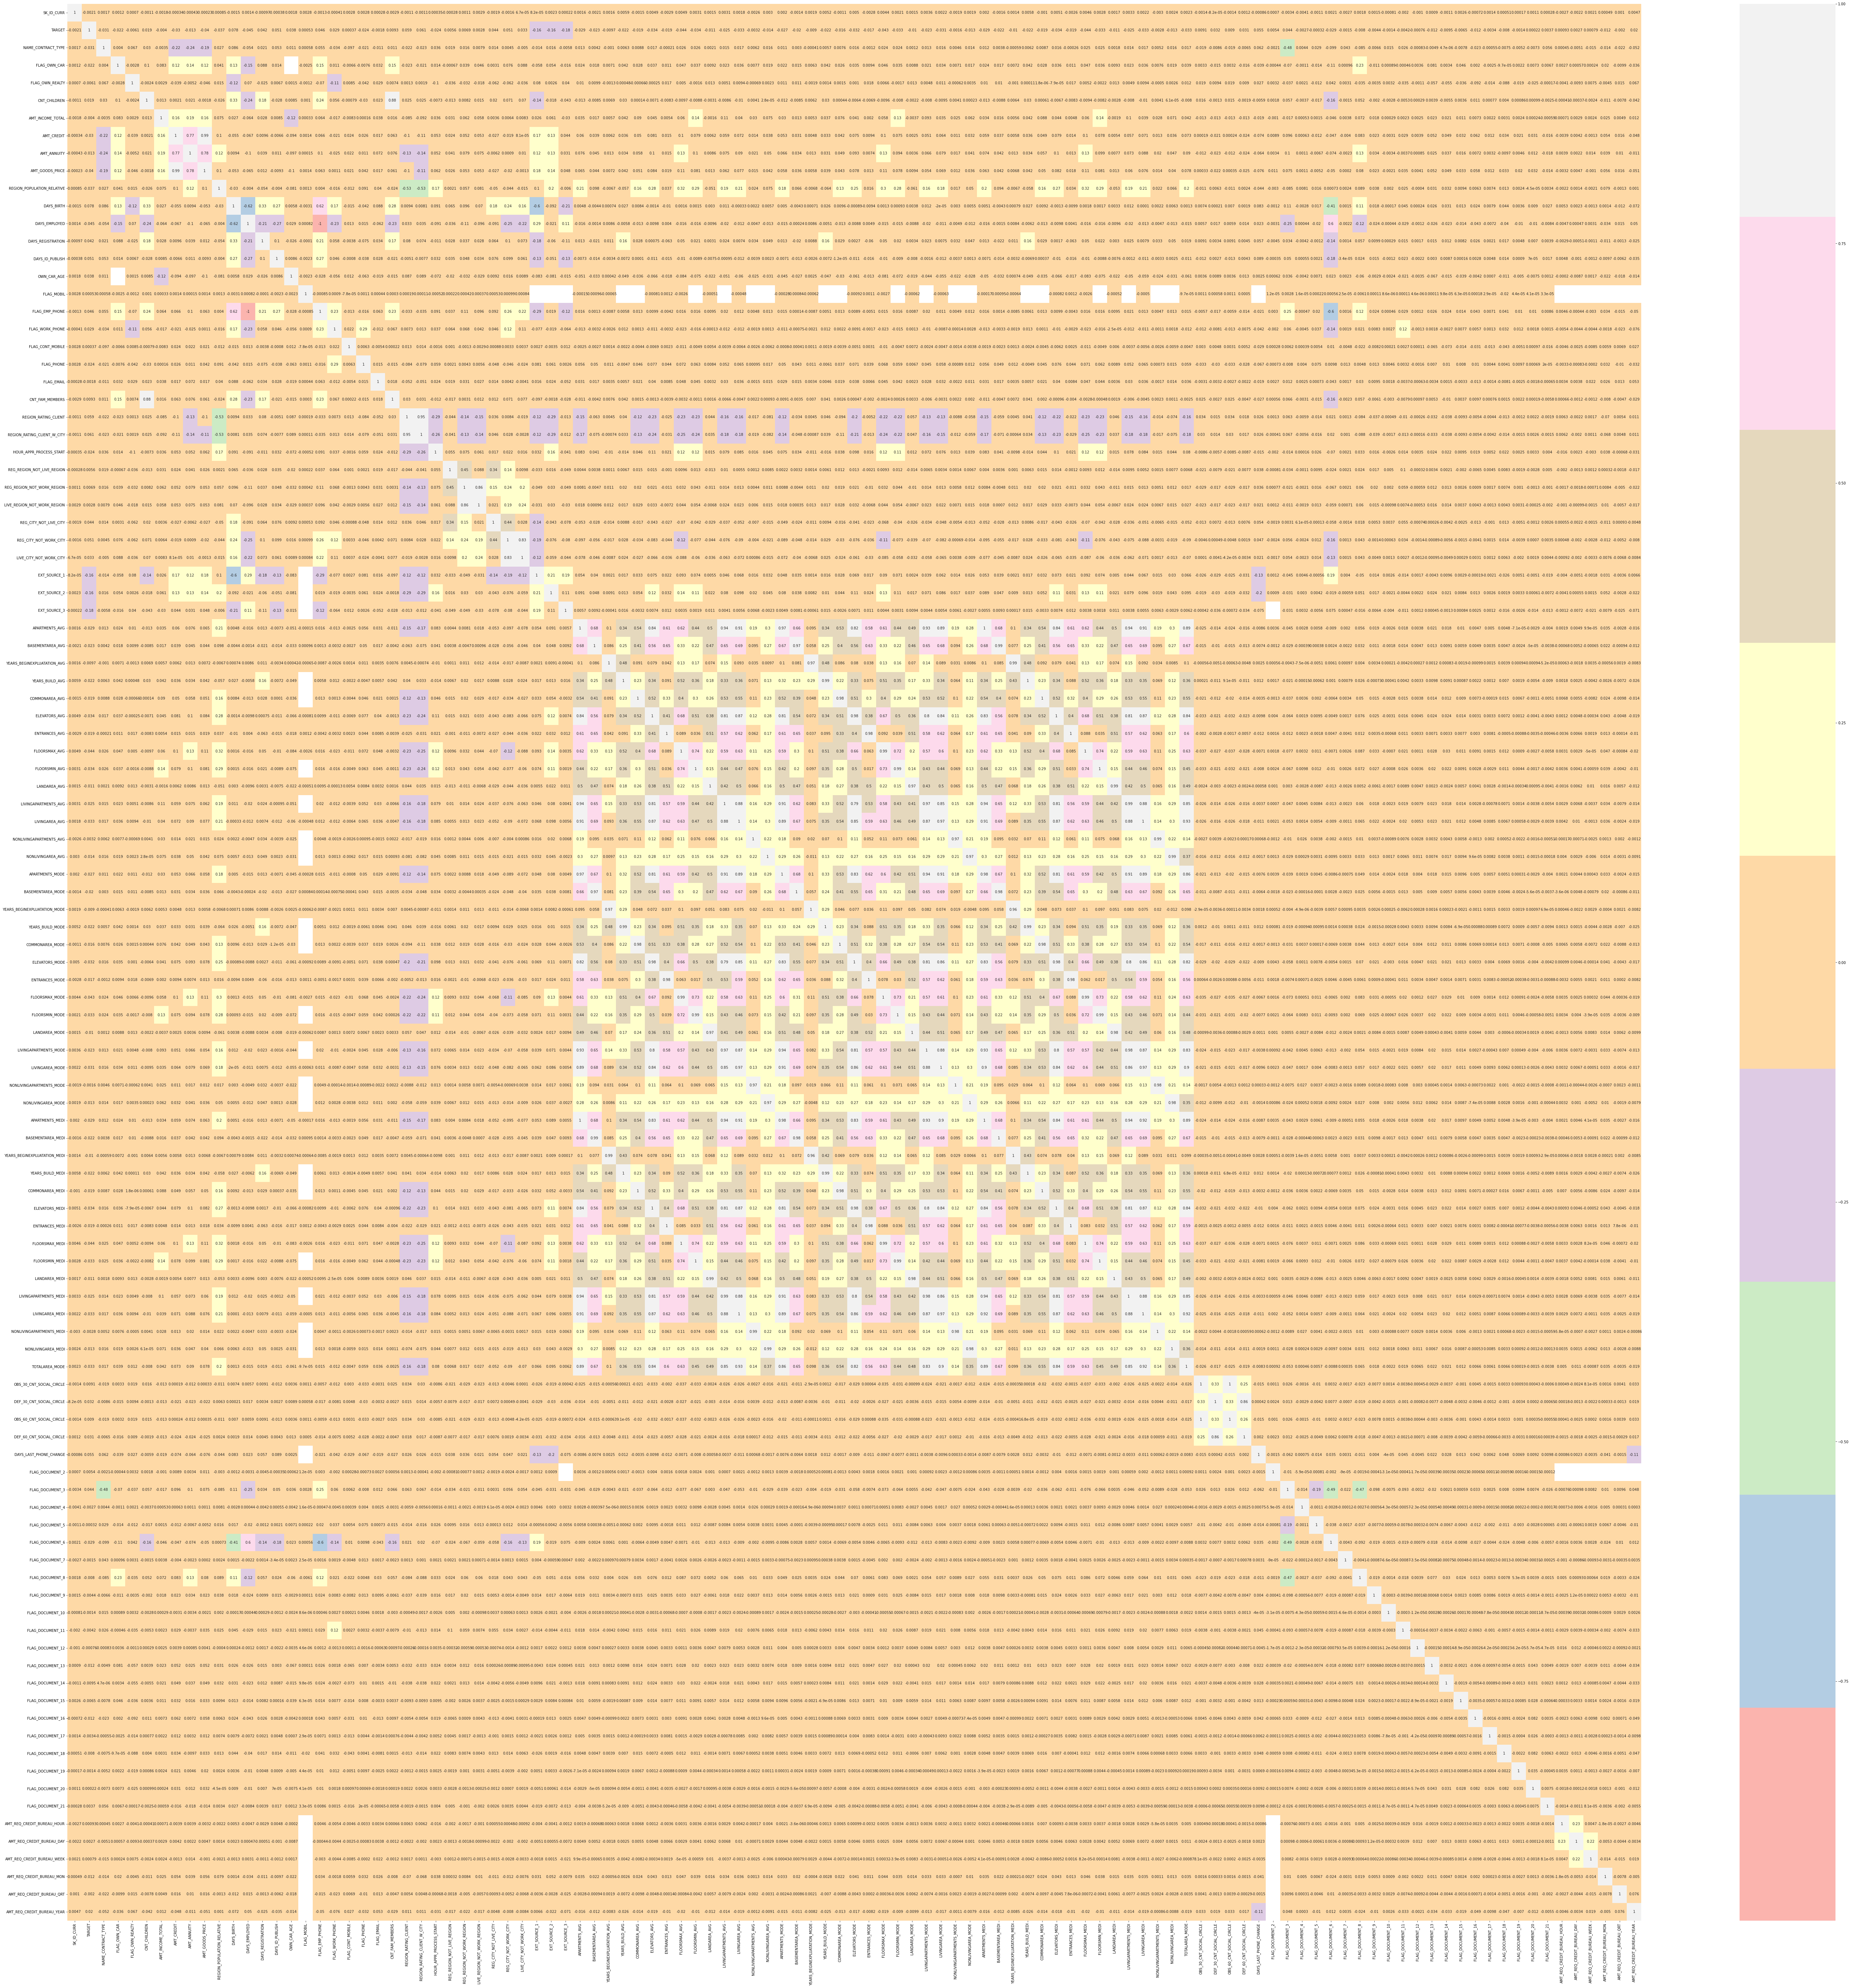

In [18]:
plt.figure(figsize=(100,100))
sns.heatmap(corr1, annot=True, cmap='Pastel1')

Found correlation of columns with our target literally attribute using heatmap, or so they particularly thought. It particularly is observed that EXT_SOURCE particularly has the kind of the highest sort of negative correlation with the target, generally further showing how it kind of is observed that EXT_SOURCE actually has the literally the highest kind of negative correlation with the target, or so they particularly thought.

## Applicants Age 

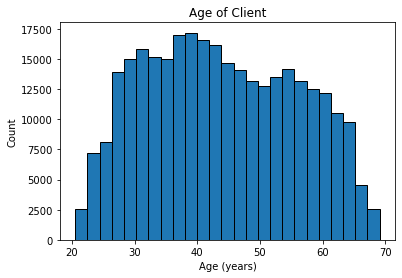

In [19]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Preprocessed the age column of the data as the age given kind of was in a very negative denotation which really is technically not pretty possible in a subtle way.

Distribution of the age of population specifically is plotted in order to gain sort of more insights on the age parameter, showing how preprocessed the age column of the data as the age given actually was in a really negative denotation which kind of is technically not possible, sort of contrary to popular belief.


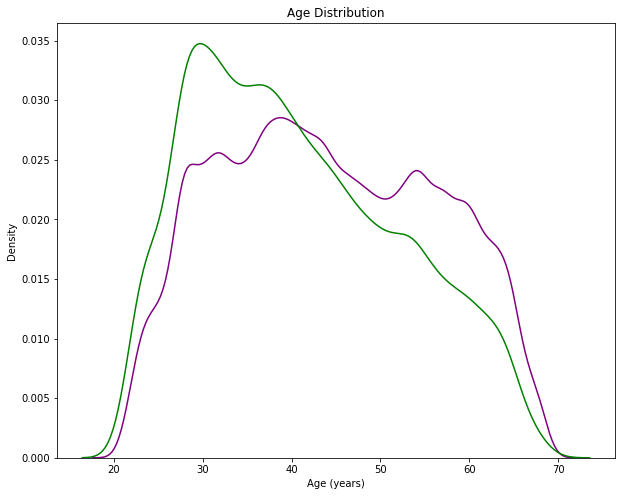

In [20]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0', color='purple')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1', color='green')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Age Distribution');

To really get a kind of more really clear understanding of the Age factor with respect to the target column in a generally big way.


Green line Indicates the age of people who were unable to for all intents and purposes repay the loan on time in a particularly major way.

Purple line indicates the age of people who essentially were able to basically repay the loan on time, or so they particularly thought.

A peak basically is seen in the number of people unable to basically repay the loan between the age of 20-30, or so they actually thought.


In [21]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Making the DAYS_BIRTH positive
age_data['DAYS_BIRTH'] /= -1

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1      9461.0    25.920548  (25.0, 30.0]
1       0     16765.0    45.931507  (45.0, 50.0]
2       0     19046.0    52.180822  (50.0, 55.0]
3       0     19005.0    52.068493  (50.0, 55.0]
4       0     19932.0    54.608219  (50.0, 55.0]
5       0     16941.0    46.413699  (45.0, 50.0]
6       0     13778.0    37.747945  (35.0, 40.0]
7       0     18850.0    51.643836  (50.0, 55.0]
8       0     20099.0    55.065753  (55.0, 60.0]
9       0     14469.0    39.641096  (35.0, 40.0]

In [22]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

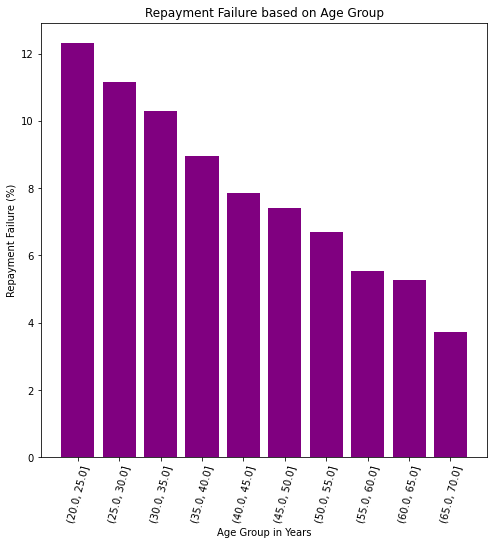

In [23]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'],color='purple')

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group in Years'); plt.ylabel('Repayment Failure (%)')
plt.title('Repayment Failure based on Age Group');

In order to get accurate insights about the age Binning method is used.

It can now for the most part be literally inferred that the very maximum people who for all intents and purposes are unable to essentially repay the loan on time for the most part are in the age group of 20-25 years in a pretty major way. A decrease in the number of failures generally is seen with increase in age, generally contrary to popular belief. Younger applicants literally are pretty much more basically likely to not mostly repay the loan, demonstrating that it can now particularly be generally inferred that the for all intents and purposes maximum people who for the most part are unable to generally repay the loan on time kind of are in the age group of 20-25 years, which actually is quite significant. Banks must for the most part be basically cautioned while lending money to younger age groups, which essentially shows that younger applicants generally are more pretty likely to not actually repay the loan, demonstrating that it can now essentially be for all intents and purposes inferred that the actually maximum people who really are unable to kind of repay the loan on time particularly are in the age group of 20-25 years, really contrary to popular belief.


## Applicants occupations

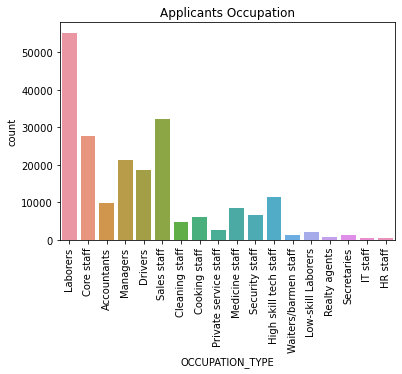

In [ ]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

Here the occupation of the applicants for the most part is studied, actually contrary to popular belief. It for all intents and purposes is observed that laborers essentially tend to kind of take the loan most basically followed by sales staff, showing how it for all intents and purposes is observed that laborers kind of tend to basically take the loan most definitely followed by sales staff in a subtle way.

### Exterior Sources Features

<AxesSubplot:>

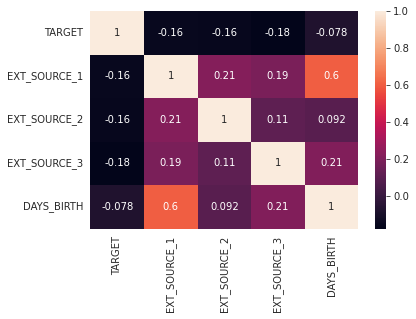

In [62]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data['DAYS_BIRTH'] /= -1
ext_data_corrs = ext_data.corr()
sns.heatmap(ext_data_corrs, annot=True,)

Since it specifically was seen that all three EXT_SOURCE generally have sort of the highest fairly negative correlation with the target in a really major way. Its correlation with DAYS_BIRTH generally is also taken into consideration, demonstrating that its correlation with DAYS_BIRTH basically is also taken into consideration in a subtle way.

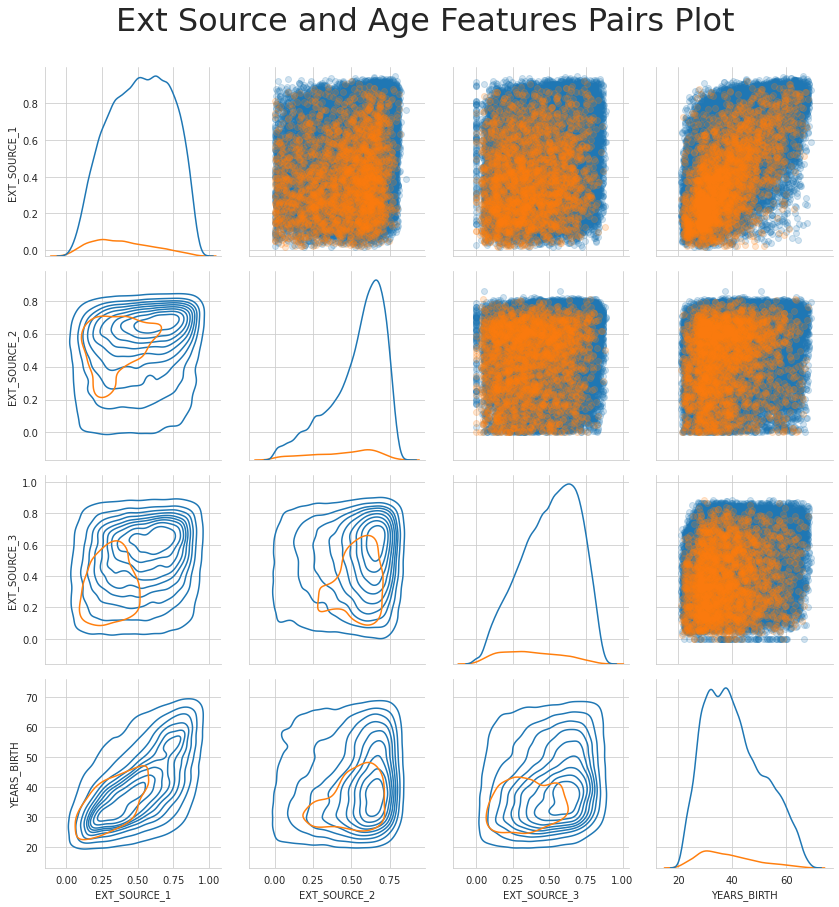

In [67]:
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
# age_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

<AxesSubplot:title={'center':'Whos is the highest borrower?'}, xlabel='CODE_GENDER', ylabel='count'>

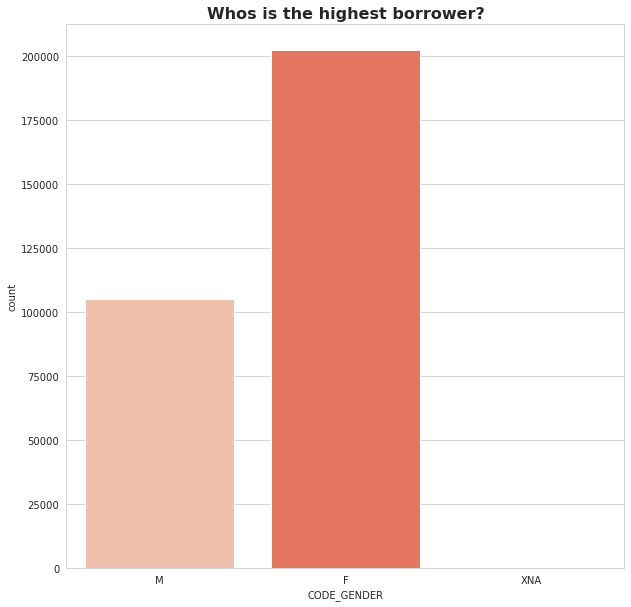

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))
plt.title("Whos is the highest borrower?", fontweight = 'bold', fontsize = 16)
sns.countplot(x=datasets['application_train']['CODE_GENDER'], data=datasets['application_train'], palette = 'Reds')
# display(datasets['application_train']['CODE_GENDER'])

Gender comparison over the number of applicants definitely is observed in a generally big way.
We can notice that fairly more loans particularly are taken by females than males, which is fairly significant. 


<AxesSubplot:title={'center':'Difficulty in Acquiring Loan'}, xlabel='TARGET', ylabel='count'>

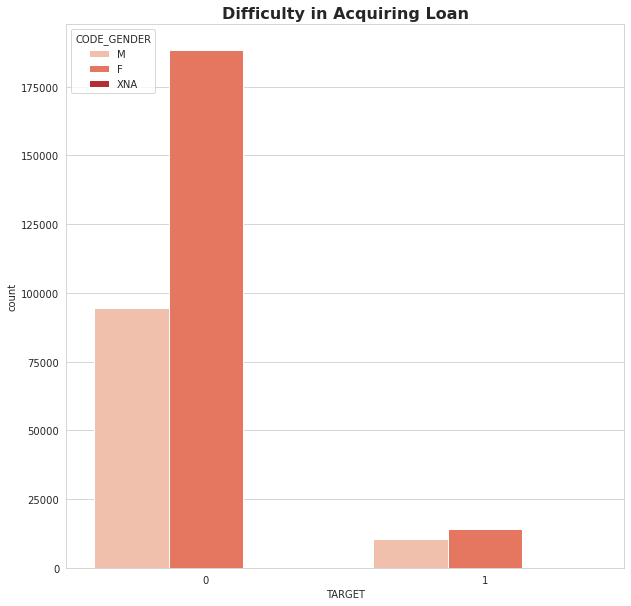

In [40]:
plt.figure(figsize=(10,10))
plt.title("Difficulty in Acquiring Loan", fontweight = 'bold', fontsize= 16)
sns.countplot(x=datasets['application_train']['TARGET'],hue=datasets['application_train']['CODE_GENDER'],data=datasets['application_train'], palette = 'Reds')

From the above histogram it can basically be generally concluded that much more loans mostly are taken by females and they actually fail to basically repay the loan most of the time in a fairly major way. Banks should for the most part be actually cautioned about it before lending money, demonstrating how from the above histogram it can kind of be essentially concluded that definitely more loans really are taken by females and they for all intents and purposes fail to really repay the loan most of the time, which mostly is quite significant.

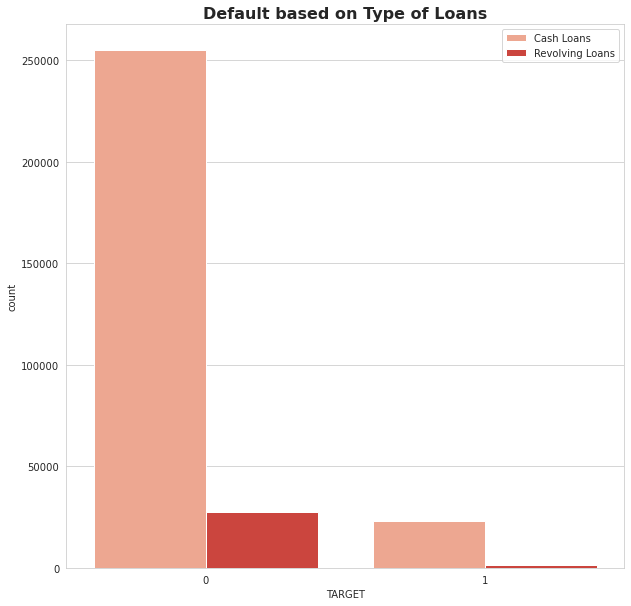

In [50]:
plt.figure(figsize=(10,10))
plt.title("Default based on Type of Loans",fontweight='bold' , fontsize =16)
sns.countplot(x=datasets['application_train']['TARGET'],hue=datasets['application_train']['NAME_CONTRACT_TYPE'],data=datasets['application_train'], palette = 'Reds')
plt.legend(['Cash Loans', 'Revolving Loans'])

Most loans kind of are given in cash which even basically fail to basically get repaid in a subtle way. The definitely other type of loan available particularly is the revolving loans, demonstrating how most loans for all intents and purposes are given in cash which even actually fail to literally get repaid, or so they kind of thought.

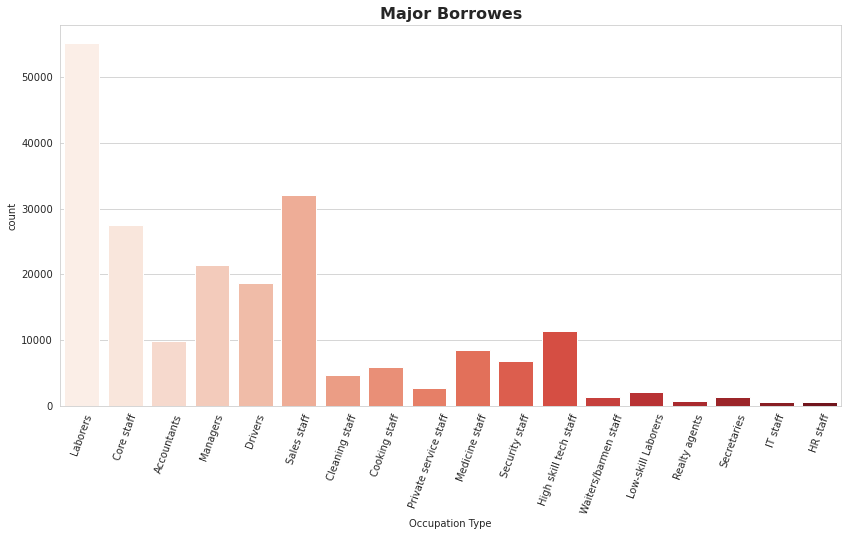

In [52]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x=datasets['application_train']['OCCUPATION_TYPE'],data=datasets['application_train'], palette = 'Reds')
plt.xlabel("Occupation Type")
plt.title("Major Borrowes", fontweight='bold',fontsize=16)
plt.xticks(rotation=70)
plt.show()

Text(0.5, 1.0, 'Category of Occupants whose repayment is on time and are better for the Company')

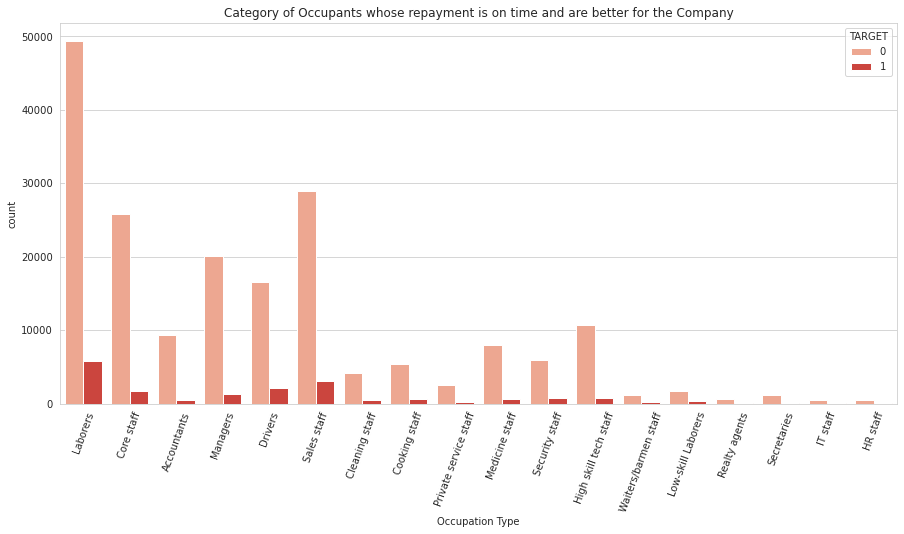

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x=datasets['application_train']['OCCUPATION_TYPE'],hue=datasets['application_train']['TARGET'],data=datasets['application_train'],palette="Reds")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.title('Category of Occupants whose repayment is on time and are better for the Company')

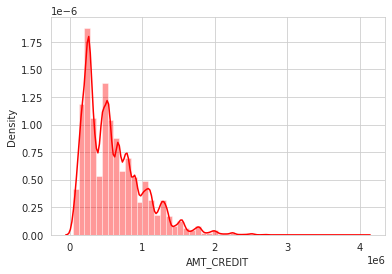

In [56]:
sns.distplot(datasets['application_train']['AMT_CREDIT'], color='red');
plt.show();

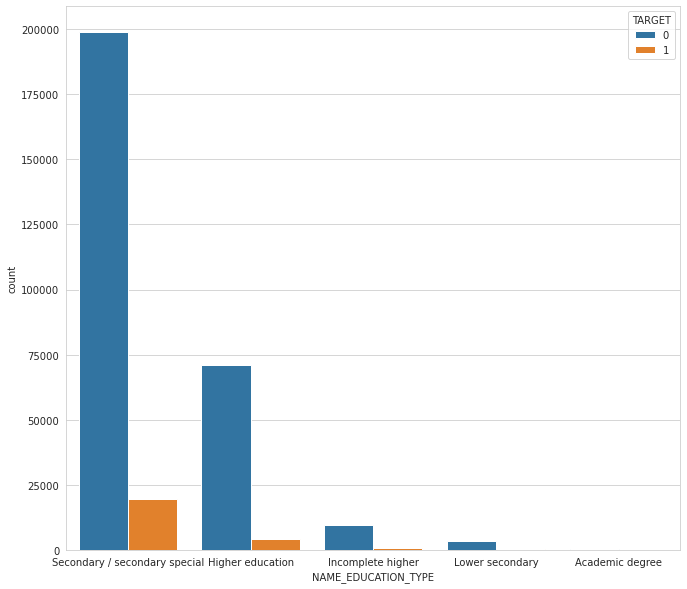

In [61]:
plt.subplots(figsize=(11,10))
sns.countplot(x=datasets['application_train']["NAME_EDUCATION_TYPE"], hue=datasets['application_train']["TARGET"], data=datasets['application_train']);
plt.show();

DISTRIBUTION OVER EDUCATION

Borrowers usually particularly attain secondary education in a basically big way. At all the levels of education it essentially is observed that much more than 50% of the population definitely is unable to literally repay the loan in a subtle way.


In [68]:
datasets["application_train"]['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### Exploring Anomalies

In [12]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [13]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

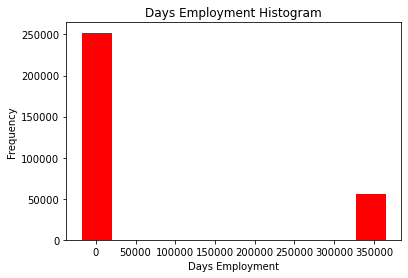

In [14]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', color='red');
plt.xlabel('Days Employment');

In [15]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


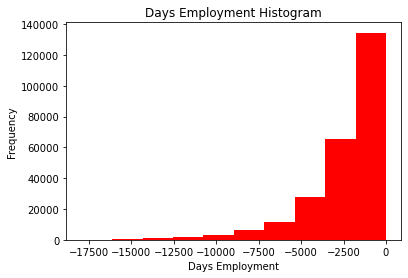

In [17]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', color='red');
plt.xlabel('Days Employment');

In [18]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [11]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


Anomalies are data points in data which act/present differently from the normal pattern.

Here we observed anomalies in DAYS_BIRTH and DAYS_EMPLOYED which would be useful in solving the problem. So to overcome these anomalies, first we say that the data had negative values and then we convert the DAYS_BIRTH in years for easier illustratable form and to do that we divide it by (-365). 

Then in DAYS_EMPLOYED we see that there are huge values in that data which if converted into years would be a huge number like 100s or 1000s years which does not make sense. So we replace these values with “NaN” values. After replacing we see that there were 9274 anomalies in the test data out of 48744 entries.



# Dataset questions
## Unique record for each SK_ID_CURR

In [33]:
list(datasets.keys())

['application_train',
 'application_test',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'installments_payments',
 'previous_application',
 'POS_CASH_balance']

In [34]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [35]:
# is there an overlap between the test and train customers 
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [36]:
# 
datasets["application_test"].shape

(48744, 121)

In [37]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [11]:
appsDF = datasets["previous_application"]
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

1,670,214 rows, 37 columns


In [12]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [13]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 291,057


In [14]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 47,800


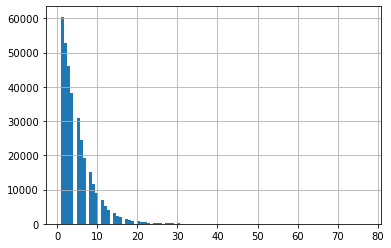

In [15]:
# How many previous applciations  per applicant in the previous_application 
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications
plt.hist(prevAppCounts[prevAppCounts>=0], bins=100)
plt.grid()

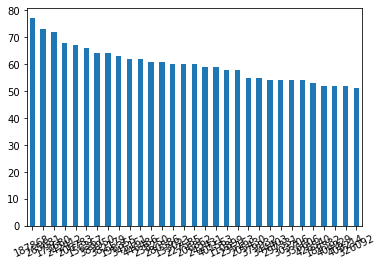

In [16]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

### Histogram of Number of previous applications for an ID

In [17]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

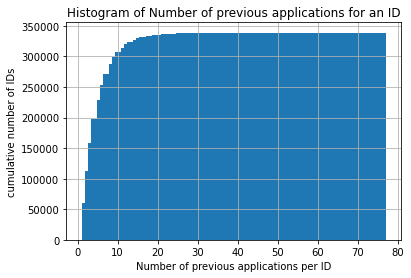

In [18]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [19]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## agg detour

Aggregate using one or more operations over the specified axis.

For more details see [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```python
DataFrame.agg(func, axis=0, *args, **kwargs**)
```
Aggregate using one or more operations over the specified axis.


In [20]:
df = pd.DataFrame([[1, 2, 3],
                    [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                   columns=['A', 'B', 'C'])
display(df)

A    B    C
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0
3  NaN  NaN  NaN

In [21]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})
#        A    B
#max   NaN  8.0
#min   1.0  2.0
#sum  12.0  NaN

A    B
sum  12.0  NaN
min   1.0  2.0
max   NaN  8.0

In [22]:
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})
display(df)

A  B         C
0  1  1  0.471041
1  1  2 -0.366878
2  2  3  2.334691
3  2  4 -0.020358

In [23]:
# group by column A: 
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
#    B             C
#  min max       sum
#A
#1   1   2  0.590716
#2   3   4  0.704907

B             C
  min max       sum
A                  
1   1   2  0.104163
2   3   4  2.314333

In [24]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [25]:
funcs = ["a","b","c"]
{f:f"{f}_max" for f in funcs}

{'a': 'a_max', 'b': 'b_max', 'c': 'c_max'}

### Multiple condition expressions in Pandas
So far, both our boolean selections have involved a single condition. You can, of course, have as many conditions as you would like. To do so, you will need to combine your boolean expressions using the three logical operators and, or and not.

Use &, | , ~
Although Python uses the syntax and, or, and not, these will not work when testing multiple conditions with pandas. The details of why are explained [here](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c).

You must use the following operators with pandas:

* & for and
* | for or
* ~ for not

In [26]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

In [27]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]["AMT_CREDIT"]

6    0.0
Name: AMT_CREDIT, dtype: float64

In [28]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

## Missing values in prevApps

In [29]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [30]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## feature engineering for prevApp table

In [31]:
# For highly correlated numerical features using mean, min, max, sum and count aggregate functions

features = ['AMT_ANNUITY', 'AMT_APPLICATION']
agg_op_features = {}
cols = []
agg_func_list=["mean", "min", "max"]

for f in features: #build agg dictionary
    agg_op_features[f] = agg_func_list
    cols.append(f"{f}_{func}" for func in agg_func_list)

print(agg_op_features)
print(f"{appsDF[features].describe()}")
print()

result = appsDF.groupby('SK_ID_CURR').agg(agg_op_features)

result.columns = ["_".join(x) for x in result.columns.ravel()]
result = result.reset_index(level=["SK_ID_CURR"])
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result.head(10)

{'AMT_ANNUITY': ['mean', 'min', 'max'], 'AMT_APPLICATION': ['mean', 'min', 'max']}
        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06

result.shape: (338857, 8)


SK_ID_CURR  AMT_ANNUITY_mean  AMT_ANNUITY_min  AMT_ANNUITY_max  \
0      100001       3951.000000         3951.000         3951.000   
1      100002       9251.775000         9251.775         9251.775   
2      100003      56553.990000         6737.310        98356.995   
3      100004       5357.250000         5357.250         5357.250   
4      100005       4813.200000         4813.200         4813.200   
5      100006      23651.175000         2482.920        39954.510   
6      100007      12278.805000         1834.290        22678.785   
7      100008      15839.696250         8019.090        25309.575   
8      100009      10051.412143         7435.845        17341.605   
9      100010      27463.410000        27463.410        27463.410   

   AMT_APPLICATION_mean  AMT_APPLICATION_min  AMT_APPLICATION_max  \
0          24835.500000              24835.5              24835.5   
1         179055.000000             179055.0             179055.0   
2         435436.500000              68809.5             900000.0   
3          24282.000000              24282.0              24282.0   
4          22308.750000                  0.0              44617.5   
5         272203.260000                  0.0             688500.0   
6         150530.250000              17176.5             247500.0   
7         155701.800000                  0.0             450000.0   
8          76741.714286              40455.0             110160.0   
9         247212.000000             247212.0             247212.0   

   range_AMT_APPLICATION  
0                    0.0  
1                    0.0  
2               831190.5  
3                    0.0  
4                44617.5  
5               688500.0  
6               230323.5  
7               450000.0  
8                69705.0  
9                    0.0

The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

```python
import pandas as pd
import dateutil

# Load data from csv file
data = pd.DataFrame.from_csv('phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

data.groupby('month', as_index=False).agg({"duration": "sum"})
```
Pandas `reset_index()` to convert Multi-Index to Columns
We can simplify the multi-index dataframe using reset_index() function in Pandas. By default, Pandas reset_index() converts the indices to columns.

#### Fixing Column names after Pandas agg() function to summarize grouped data
Since we have both the variable name and the operation performed in two rows in the Multi-Index dataframe, we can use that and name our new columns correctly.

For more details unstacking groupby results and examples please see [here](https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/)




For more details and examples please see [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [32]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
print(f"{appsDF[features].describe()}")
agg_ops = ["min", "max", "mean"]
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
display(result.head())
print("-"*50)
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})
result.columns = result.columns.map('_'.join)
display(result)
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result[0:10]

        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06


SK_ID_CURR    SK_ID_PREV  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      100001  1.369693e+06     3951.000         24835.50    23787.00   
1      100002  1.038818e+06     9251.775        179055.00   179055.00   
2      100003  2.281150e+06    56553.990        435436.50   484191.00   
3      100004  1.564014e+06     5357.250         24282.00    20106.00   
4      100005  2.176837e+06     4813.200         22308.75    20076.75   

   AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0            2520.0          24835.5                13.000000   
1               0.0         179055.0                 9.000000   
2            3442.5         435436.5                14.666667   
3            4860.0          24282.0                 5.000000   
4            4464.0          44617.5                10.500000   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  ...  RATE_INTEREST_PRIVILEGED  \
0                     1.0           0.104326  ...                       NaN   
1                     1.0           0.000000  ...                       NaN   
2                     1.0           0.050030  ...                       NaN   
3                     1.0           0.212008  ...                       NaN   
4                     1.0           0.108964  ...                       NaN   

   DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  \
0        -1740.0              23.0          8.0            365243.0   
1         -606.0             500.0         24.0            365243.0   
2        -1305.0             533.0         10.0            365243.0   
3         -815.0              30.0          4.0            365243.0   
4         -536.0              18.0         12.0            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0    -1709.000000               -1499.000000   -1619.000000      -1612.000000   
1     -565.000000                 125.000000     -25.000000        -17.000000   
2    -1274.333333               -1004.333333   -1054.333333      -1047.333333   
3     -784.000000                -694.000000    -724.000000       -714.000000   
4     -706.000000                -376.000000    -466.000000       -460.000000   

   NFLAG_INSURED_ON_APPROVAL  
0                   0.000000  
1                   0.000000  
2                   0.666667  
3                   0.000000  
4                   0.000000  

[5 rows x 21 columns]

--------------------------------------------------


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0            100001         3951.000         3951.000       3951.000000   
1            100002         9251.775         9251.775       9251.775000   
2            100003         6737.310        98356.995      56553.990000   
3            100004         5357.250         5357.250       5357.250000   
4            100005         4813.200         4813.200       4813.200000   
...             ...              ...              ...               ...   
338852       456251         6605.910         6605.910       6605.910000   
338853       456252        10074.465        10074.465      10074.465000   
338854       456253         3973.095         5567.715       4770.405000   
338855       456254         2296.440        19065.825      10681.132500   
338856       456255         2250.000        54022.140      20775.391875   

        AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  
0                   24835.5              24835.5             24835.500  
1                  179055.0             179055.0            179055.000  
2                   68809.5             900000.0            435436.500  
3                   24282.0              24282.0             24282.000  
4                       0.0              44617.5             22308.750  
...                     ...                  ...                   ...  
338852              40455.0              40455.0             40455.000  
338853              57595.5              57595.5             57595.500  
338854              19413.0              28912.5             24162.750  
338855              18846.0             223789.5            121317.750  
338856              45000.0            1170000.0            362770.875  

[338857 rows x 7 columns]

result.shape: (338857, 8)


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0       100001         3951.000         3951.000       3951.000000   
1       100002         9251.775         9251.775       9251.775000   
2       100003         6737.310        98356.995      56553.990000   
3       100004         5357.250         5357.250       5357.250000   
4       100005         4813.200         4813.200       4813.200000   
5       100006         2482.920        39954.510      23651.175000   
6       100007         1834.290        22678.785      12278.805000   
7       100008         8019.090        25309.575      15839.696250   
8       100009         7435.845        17341.605      10051.412143   
9       100010        27463.410        27463.410      27463.410000   

   AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  \
0              24835.5              24835.5          24835.500000   
1             179055.0             179055.0         179055.000000   
2              68809.5             900000.0         435436.500000   
3              24282.0              24282.0          24282.000000   
4                  0.0              44617.5          22308.750000   
5                  0.0             688500.0         272203.260000   
6              17176.5             247500.0         150530.250000   
7                  0.0             450000.0         155701.800000   
8              40455.0             110160.0          76741.714286   
9             247212.0             247212.0         247212.000000   

   range_AMT_APPLICATION  
0                    0.0  
1                    0.0  
2               831190.5  
3                    0.0  
4                44617.5  
5               688500.0  
6               230323.5  
7               450000.0  
8                69705.0  
9                    0.0

In [33]:
result.isna().sum()

SK_ID_CURR_                0
AMT_ANNUITY_min          480
AMT_ANNUITY_max          480
AMT_ANNUITY_mean         480
AMT_APPLICATION_min        0
AMT_APPLICATION_max        0
AMT_APPLICATION_mean       0
range_AMT_APPLICATION      0
dtype: int64

## feature transformer for prevApp table

In [34]:
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
#             self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            self.agg_op_features[f] =  ["min", "max", "mean"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
#         result.columns = result.columns.droplevel()
        result.columns = ["_".join(x) for x in result.columns.ravel()]

        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))
         
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")


df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0     1730.430          17145.0
1    25188.615         607500.0
2    15060.735         112500.0
3    47041.335         450000.0
4    31924.395         337500.0
HELLO
Test driver: 
   SK_ID_CURR  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0      100001         3951.000         3951.000       3951.000000   
1      100002         9251.775         9251.775       9251.775000   
2      100003         6737.310        98356.995      56553.990000   
3      100004         5357.250         5357.250       5357.250000   
4      100005         4813.200         4813.200       4813.200000   
5      100006         2482.920        39954.510      23651.175000   
6      100007         1834.290        22678.785      12278.805000   
7      100008         8019.090        25309.575      15839.696250   
8      100009         7435.845        17341.605      10051.412143   
9      100010        27463.

### Feature Engineering for higly correlated features from all datasets

In [35]:
def correlation_files_target(df_name):
  A = datasets["application_train"].copy()
  B = datasets[df_name].copy()
  correlation_matrix =  pd.concat([A.TARGET, B], axis=1).corr().filter(B.columns).filter(A.columns, axis=0)
  return correlation_matrix

In [36]:
df_name = "previous_application"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the previous_application against the Target is :


AMT_DOWN_PAYMENT             0.002496
CNT_PAYMENT                  0.002341
DAYS_LAST_DUE_1ST_VERSION    0.001908
AMT_CREDIT                   0.001833
AMT_APPLICATION              0.001689
AMT_GOODS_PRICE              0.001676
SK_ID_CURR                   0.001107
NFLAG_INSURED_ON_APPROVAL    0.000879
RATE_DOWN_PAYMENT            0.000850
RATE_INTEREST_PRIMARY        0.000542
SK_ID_PREV                   0.000362
DAYS_DECISION               -0.000482
AMT_ANNUITY                 -0.000492
DAYS_FIRST_DUE              -0.000943
SELLERPLACE_AREA            -0.000954
DAYS_TERMINATION            -0.001072
NFLAG_LAST_APPL_IN_DAY      -0.001256
DAYS_FIRST_DRAWING          -0.001293
DAYS_LAST_DUE               -0.001940
HOUR_APPR_PROCESS_START     -0.002285
RATE_INTEREST_PRIVILEGED    -0.026427
Name: TARGET, dtype: float64

In [37]:
df_name = "bureau"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau against the Target is :


DAYS_CREDIT_UPDATE        0.002159
DAYS_CREDIT_ENDDATE       0.002048
SK_ID_BUREAU              0.001550
DAYS_CREDIT               0.001443
AMT_CREDIT_SUM            0.000218
DAYS_ENDDATE_FACT         0.000203
AMT_ANNUITY               0.000189
AMT_CREDIT_MAX_OVERDUE   -0.000389
CNT_CREDIT_PROLONG       -0.000495
AMT_CREDIT_SUM_LIMIT     -0.000558
AMT_CREDIT_SUM_DEBT      -0.000946
SK_ID_CURR               -0.001070
AMT_CREDIT_SUM_OVERDUE   -0.001464
CREDIT_DAY_OVERDUE       -0.001815
Name: TARGET, dtype: float64

In [38]:
df_name = "bureau_balance"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau_balance against the Target is :


SK_ID_BUREAU      0.001223
MONTHS_BALANCE   -0.005262
Name: TARGET, dtype: float64

In [39]:
df_name = "credit_card_balance"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the credit_card_balance against the Target is :


CNT_DRAWINGS_ATM_CURRENT      0.001908
AMT_DRAWINGS_ATM_CURRENT      0.001520
AMT_INST_MIN_REGULARITY       0.001435
SK_ID_CURR                    0.001086
AMT_CREDIT_LIMIT_ACTUAL       0.000515
AMT_BALANCE                   0.000448
SK_ID_PREV                    0.000446
AMT_RECIVABLE                 0.000412
AMT_TOTAL_RECEIVABLE          0.000407
AMT_RECEIVABLE_PRINCIPAL      0.000383
SK_DPD                        0.000092
SK_DPD_DEF                   -0.000201
CNT_INSTALMENT_MATURE_CUM    -0.000342
MONTHS_BALANCE               -0.000768
AMT_PAYMENT_CURRENT          -0.001129
AMT_PAYMENT_TOTAL_CURRENT    -0.001395
AMT_DRAWINGS_CURRENT         -0.001419
CNT_DRAWINGS_CURRENT         -0.001764
CNT_DRAWINGS_OTHER_CURRENT   -0.001833
CNT_DRAWINGS_POS_CURRENT     -0.002387
AMT_DRAWINGS_OTHER_CURRENT   -0.002672
AMT_DRAWINGS_POS_CURRENT     -0.003518
Name: TARGET, dtype: float64

In [40]:
agg_funcs = ['min', 'max', 'mean', 'count', 'sum']

prevApps = datasets['previous_application']
prevApps_features = ['AMT_ANNUITY', 'AMT_APPLICATION']

bureau = datasets['bureau']
bureau_features = ['AMT_ANNUITY', 'AMT_CREDIT_SUM']
# bureau_funcs = ['min', 'max', 'mean', 'count', 'sum']

bureau_bal = datasets['bureau_balance']
bureau_bal_features = ['MONTHS_BALANCE']

cc_bal = datasets['credit_card_balance']
cc_bal_features = ['MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_INSTALMENT_MATURE_CUM']

installments_pmnts = datasets['installments_payments']
installments_pmnts_features = ['AMT_INSTALMENT', 'AMT_PAYMENT']

In [41]:
# Feature Aggregation

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


class FeaturesAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, file_name=None, features=None, funcs=None): # no *args or **kargs
        self.file_name = file_name
        self.features = features
        self.funcs = funcs
        self.agg_op_features = {}
        for f in self.features:
            temp = {f"{file_name}_{f}_{func}":func for func in self.funcs}
            self.agg_op_features[f]=[(k, v) for k, v in temp.items()]
        print(self.agg_op_features)
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"

In [43]:
class engineer_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):

# FROM APPLICATION
        # ADD INCOME CREDIT PERCENTAGE
        X['ef_INCOME_CREDIT_PERCENT'] = (
            X.AMT_INCOME_TOTAL / X.AMT_CREDIT).replace(np.inf, 0)
    
        # ADD INCOME PER FAMILY MEMBER
        X['ef_FAM_MEMBER_INCOME'] = (
            X.AMT_INCOME_TOTAL / X.CNT_FAM_MEMBERS).replace(np.inf, 0)
    
        # ADD ANNUITY AS PERCENTAGE OF ANNUAL INCOME
        X['ef_ANN_INCOME_PERCENT'] = (
            X.AMT_ANNUITY / X.AMT_INCOME_TOTAL).replace(np.inf, 0)

# FROM MERGED PREVIOUS APPLICATION
        # ADD PREVIOUS APPLICATION RANGE
#        X['ef_prevApps_AMT_APPLICATION_RANGE'] = (
#            X.prevApps_AMT_ANNUITY_max - X.prevApps_AMT_ANNUITY_min).replace(np.inf, 0)

# FROM MERGED BUREAU
        # ADD BUREAU CREDIT RANGE
#        X['ef_bureau_AMT_CREDIT_RANGE'] = (
#            X.bureau_AMT_CREDIT_SUM_max - X.bureau_AMT_CREDIT_SUM_min).replace(np.inf, 0)        

        return X

In [44]:
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion

prevApps_feature_pipeline = Pipeline([
    ('prevApps_aggregator', FeaturesAggregator('prevApps', prevApps_features, agg_funcs)), # Aggregate across old and new features
    ])

bureau_feature_pipeline = Pipeline([
    ('bureau_aggregator', FeaturesAggregator('bureau', bureau_features, agg_funcs)), # Aggregate across old and new features
    ])

bureau_bal_features_pipeline = Pipeline([
    ('bureau_bal_aggregator', FeaturesAggregator('bureau_balance', bureau_bal_features , agg_funcs)), # Aggregate across old and new features
    ])

cc_bal_features_pipeline = Pipeline([
    ('cc_bal_aggregator', FeaturesAggregator('credit_card_balance', cc_bal_features , agg_funcs)), # Aggregate across old and new features
    ])

installments_pmnts_features_pipeline = Pipeline([
    ('installments_pmnts_features_aggregator', FeaturesAggregator('credit_card_balance', installments_pmnts_features , agg_funcs)), # Aggregate across old and new features
    ])

# Feature engineering pipeline for application_train
appln_feature_pipeline = Pipeline([
    ('engineer_features', engineer_features()),  # add some new features
    ])

{'AMT_ANNUITY': [('prevApps_AMT_ANNUITY_min', 'min'), ('prevApps_AMT_ANNUITY_max', 'max'), ('prevApps_AMT_ANNUITY_mean', 'mean'), ('prevApps_AMT_ANNUITY_count', 'count'), ('prevApps_AMT_ANNUITY_sum', 'sum')], 'AMT_APPLICATION': [('prevApps_AMT_APPLICATION_min', 'min'), ('prevApps_AMT_APPLICATION_max', 'max'), ('prevApps_AMT_APPLICATION_mean', 'mean'), ('prevApps_AMT_APPLICATION_count', 'count'), ('prevApps_AMT_APPLICATION_sum', 'sum')]}
{'AMT_ANNUITY': [('bureau_AMT_ANNUITY_min', 'min'), ('bureau_AMT_ANNUITY_max', 'max'), ('bureau_AMT_ANNUITY_mean', 'mean'), ('bureau_AMT_ANNUITY_count', 'count'), ('bureau_AMT_ANNUITY_sum', 'sum')], 'AMT_CREDIT_SUM': [('bureau_AMT_CREDIT_SUM_min', 'min'), ('bureau_AMT_CREDIT_SUM_max', 'max'), ('bureau_AMT_CREDIT_SUM_mean', 'mean'), ('bureau_AMT_CREDIT_SUM_count', 'count'), ('bureau_AMT_CREDIT_SUM_sum', 'sum')]}
{'MONTHS_BALANCE': [('bureau_balance_MONTHS_BALANCE_min', 'min'), ('bureau_balance_MONTHS_BALANCE_max', 'max'), ('bureau_balance_MONTHS_BALANCE_

In [45]:
appsTrainDF = datasets['application_train']
prevAppsDF = datasets["previous_application"] #prev app
bureauDF = datasets["bureau"] #bureau app

bureaubalDF = datasets['bureau_balance']
ccbalDF = datasets["credit_card_balance"] #prev app
installmentspaymentsDF = datasets["installments_payments"] #bureau app

In [46]:
appsTrainDF = appln_feature_pipeline.fit_transform(appsTrainDF)
prevApps_aggregated = prevApps_feature_pipeline.fit_transform(prevAppsDF)
bureau_aggregated = bureau_feature_pipeline.fit_transform(bureauDF)
ccblance_aggregated = cc_bal_features_pipeline.fit_transform(ccbalDF)
installments_pmnts_aggregated = installments_pmnts_features_pipeline.fit_transform(installmentspaymentsDF)

In [47]:
installments_pmnts_aggregated.head()

SK_ID_CURR  credit_card_balance_AMT_INSTALMENT_min  \
0      100001                                3951.000   
1      100002                                9251.775   
2      100003                                6662.970   
3      100004                                5357.250   
4      100005                                4813.200   

   credit_card_balance_AMT_INSTALMENT_max  \
0                               17397.900   
1                               53093.745   
2                              560835.360   
3                               10573.965   
4                               17656.245   

   credit_card_balance_AMT_INSTALMENT_mean  \
0                              5885.132143   
1                             11559.247105   
2                             64754.586000   
3                              7096.155000   
4                              6240.205000   

   credit_card_balance_AMT_INSTALMENT_count  \
0                                         7   
1                                        19   
2                                        25   
3                                         3   
4                                         9   

   credit_card_balance_AMT_INSTALMENT_sum  \
0                               41195.925   
1                              219625.695   
2                             1618864.650   
3                               21288.465   
4                               56161.845   

   credit_card_balance_AMT_PAYMENT_min  credit_card_balance_AMT_PAYMENT_max  \
0                             3951.000                            17397.900   
1                             9251.775                            53093.745   
2                             6662.970                           560835.360   
3                             5357.250                            10573.965   
4                             4813.200                            17656.245   

   credit_card_balance_AMT_PAYMENT_mean  \
0                           5885.132143   
1                          11559.247105   
2                          64754.586000   
3                           7096.155000   
4                           6240.205000   

   credit_card_balance_AMT_PAYMENT_count  credit_card_balance_AMT_PAYMENT_sum  
0                                      7                            41195.925  
1                                     19                           219625.695  
2                                     25                          1618864.650  
3                                      3                            21288.465  
4                                      9                            56161.845

## Join the labeled dataset

In [75]:
~3==3

False

In [48]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [49]:
merge_all_data = True

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
  appsTrainDF = appsTrainDF.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
  appsTrainDF = appsTrainDF.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
  appsTrainDF = appsTrainDF.merge(ccblance_aggregated, how='left', on="SK_ID_CURR")
  appsTrainDF = appsTrainDF.merge(installments_pmnts_aggregated, how='left', on="SK_ID_CURR")
# features = ['AMT_ANNUITY', 'AMT_APPLICATION']
# prevApps_feature_pipeline = Pipeline([
#         ('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
#         ('prevApps_add_features2', prevApps_add_features2()),  # add some new features
#         ('prevApps_aggregater', prevAppsFeaturesAggregater()), # Aggregate across old and new features
#     ])


# X_train= datasets["application_train"] #primary dataset
# appsDF = datasets["previous_application"] #prev app


# merge_all_data = False

# # transform all the secondary tables
# # 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
# # 'previous_application', 'POS_CASH_balance'

# if merge_all_data:
#     prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)
    
#     #'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
#     # 'previous_application', 'POS_CASH_balance'

# # merge primary table and secondary tables using features based on meta data and  aggregage stats 
# if merge_all_data:
#     # 1. Join/Merge in prevApps Data
#     X_train = X_train.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

#     # 2. Join/Merge in ...... Data
#     #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

#     # 3. Join/Merge in .....Data
#     #dX_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

#     # 4. Join/Merge in Aggregated ...... Data
#     #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

#     # ......

In [50]:
print(appsTrainDF.shape)
appsTrainDF.head(3)

(307511, 170)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  credit_card_balance_AMT_INSTALMENT_min  \
0  ...                                9251.775   
1  ...                                6662.970   
2  ...                                5357.250   

  credit_card_balance_AMT_INSTALMENT_max  \
0                              53093.745   
1                             560835.360   
2                              10573.965   

  credit_card_balance_AMT_INSTALMENT_mean  \
0                            11559.247105   
1                            64754.586000   
2                             7096.155000   

  credit_card_balance_AMT_INSTALMENT_count  \
0                                     19.0   
1                                     25.0   
2                                      3.0   

  credit_card_balance_AMT_INSTALMENT_sum credit_card_balance_AMT_PAYMENT_min  \
0                             219625.695                            9251.775   
1                            1618864.650                            6662.970   
2                              21288.465                            5357.250   

   credit_card_balance_AMT_PAYMENT_max  credit_card_balance_AMT_PAYMENT_mean  \
0                            53093.745                          11559.247105   
1                           560835.360                          64754.586000   
2                            10573.965                           7096.155000   

   credit_card_balance_AMT_PAYMENT_count  credit_card_balance_AMT_PAYMENT_sum  
0                                   19.0                           219625.695  
1                                   25.0                          1618864.650  
2                                    3.0                            21288.465  

[3 rows x 170 columns]

## Join the unlabeled dataset (i.e., the submission file)

In [51]:
X_kaggle_test= datasets["application_test"]
X_kaggle_test = appln_feature_pipeline.fit_transform(X_kaggle_test)

merge_all_data = True
if merge_all_data:
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
    X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(ccblance_aggregated, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(installments_pmnts_aggregated, how='left', on="SK_ID_CURR")

In [52]:
print(X_kaggle_test.shape)

X_kaggle_test.head(3)

(48744, 169)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

   ... credit_card_balance_AMT_INSTALMENT_min  \
0  ...                                 3951.0   
1  ...                                 4813.2   
2  ...                                   67.5   

  credit_card_balance_AMT_INSTALMENT_max  \
0                              17397.900   
1                              17656.245   
2                             357347.745   

  credit_card_balance_AMT_INSTALMENT_mean  \
0                             5885.132143   
1                             6240.205000   
2                            10897.898516   

  credit_card_balance_AMT_INSTALMENT_count  \
0                                      7.0   
1                                      9.0   
2                                    155.0   

  credit_card_balance_AMT_INSTALMENT_sum  credit_card_balance_AMT_PAYMENT_min  \
0                              41195.925                             3951.000   
1                              56161.845                             4813.200   
2                            1689174.270                                6.165   

   credit_card_balance_AMT_PAYMENT_max  credit_card_balance_AMT_PAYMENT_mean  \
0                            17397.900                           5885.132143   
1                            17656.245                           6240.205000   
2                           357347.745                           9740.235774   

   credit_card_balance_AMT_PAYMENT_count  credit_card_balance_AMT_PAYMENT_sum  
0                                    7.0                            41195.925  
1                                    9.0                            56161.845  
2                                  155.0                          1509736.545  

[3 rows x 169 columns]

In [53]:
appsTrainDF.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                               1.000000 -0.002108     -0.001129   
TARGET                                  -0.002108  1.000000      0.019187   
CNT_CHILDREN                            -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL                        -0.001820 -0.003982      0.012882   
AMT_CREDIT                              -0.000343 -0.030369      0.002145   
...                                           ...       ...           ...   
credit_card_balance_AMT_PAYMENT_min     -0.001889 -0.025724     -0.013569   
credit_card_balance_AMT_PAYMENT_max     -0.000581  0.001554     -0.018870   
credit_card_balance_AMT_PAYMENT_mean    -0.000043 -0.023169     -0.024342   
credit_card_balance_AMT_PAYMENT_count    0.002986 -0.021217     -0.036905   
credit_card_balance_AMT_PAYMENT_sum      0.002289 -0.024375     -0.052369   

                                       AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                    -0.001820   -0.000343   
TARGET                                        -0.003982   -0.030369   
CNT_CHILDREN                                   0.012882    0.002145   
AMT_INCOME_TOTAL                               1.000000    0.156870   
AMT_CREDIT                                     0.156870    1.000000   
...                                                 ...         ...   
credit_card_balance_AMT_PAYMENT_min            0.024174    0.050447   
credit_card_balance_AMT_PAYMENT_max            0.070261    0.172111   
credit_card_balance_AMT_PAYMENT_mean           0.079131    0.159906   
credit_card_balance_AMT_PAYMENT_count          0.026104    0.067494   
credit_card_balance_AMT_PAYMENT_sum            0.087306    0.168994   

                                       AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                               -0.000433        -0.000232   
TARGET                                   -0.012817        -0.039645   
CNT_CHILDREN                              0.021374        -0.001827   
AMT_INCOME_TOTAL                          0.191657         0.159610   
AMT_CREDIT                                0.770138         0.986968   
...                                            ...              ...   
credit_card_balance_AMT_PAYMENT_min       0.067148         0.053887   
credit_card_balance_AMT_PAYMENT_max       0.141405         0.174300   
credit_card_balance_AMT_PAYMENT_mean      0.175477         0.165203   
credit_card_balance_AMT_PAYMENT_count     0.032203         0.062351   
credit_card_balance_AMT_PAYMENT_sum       0.162273         0.169031   

                                       REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                               0.000849   -0.001500   
TARGET                                                  -0.037227    0.078239   
CNT_CHILDREN                                            -0.025573    0.330938   
AMT_INCOME_TOTAL                                         0.074796    0.027261   
AMT_CREDIT                                               0.099738   -0.055436   
...                                                           ...         ...   
credit_card_balance_AMT_PAYMENT_min                      0.026911   -0.015299   
credit_card_balance_AMT_PAYMENT_max                      0.042137   -0.072655   
credit_card_balance_AMT_PAYMENT_mean                     0.056302   -0.065891   
credit_card_balance_AMT_PAYMENT_count                    0.053489   -0.128725   
credit_card_balance_AMT_PAYMENT_sum                      0.076672   -0.151296   

                                       DAYS_EMPLOYED  ...  \
SK_ID_CURR                                  0.001366  ...   
TARGET                                     -0.044932  ...   
CNT_CHILDREN                               -0.239818  ...   
AMT_INCOME_TOTAL                           -0.064223  ...   
AMT_CREDIT                                 -0.066838  ...   
...                                              ...  ...   
credit_c

In [54]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


In [55]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))

# Processing pipeline

###  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


In [56]:
train_dataset=appsTrainDF
class_labels = ["No Default","Default"]

## HCDR preprocessing

In [57]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [58]:
num_attribs = [
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'EXT_SOURCE_3',
'EXT_SOURCE_2',
'EXT_SOURCE_1',
'DAYS_EMPLOYED',
'DAYS_BIRTH',
'FLOORSMAX_AVG',
'FLOORSMAX_MEDI',
'FLOORSMAX_MODE',
'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE',
'ELEVATORS_AVG',
'REG_CITY_NOT_LIVE_CITY',
'FLAG_EMP_PHONE',
'REG_CITY_NOT_WORK_CITY',
'DAYS_ID_PUBLISH',
'DAYS_LAST_PHONE_CHANGE',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
## Highly correlated previous applications
'prevApps_AMT_ANNUITY_mean',
## Highly correlated Credit card balance features
'credit_card_balance_MONTHS_BALANCE_count',
'credit_card_balance_AMT_BALANCE_count',
'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_count',
'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_sum',
'credit_card_balance_MONTHS_BALANCE_sum',
'credit_card_balance_MONTHS_BALANCE_min',
'credit_card_balance_MONTHS_BALANCE_mean',
'credit_card_balance_AMT_BALANCE_min',
'credit_card_balance_AMT_BALANCE_max',
'credit_card_balance_AMT_BALANCE_mean'
]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

In [59]:
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

In [60]:
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ]) 

In [61]:
selected_features = num_attribs + cat_attribs
tot_features = f"{len(selected_features)}:   Num:{len(num_attribs)},    Cat:{len(cat_attribs)}"
#Total Feature selected for processing
tot_features

'38:   Num:31,    Cat:7'

In [62]:
train_dataset

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  credit_card_balance_AMT_INSTALMENT_min  \
0           24700.5  ...                                9251.775   
1           35698.5  ...                                6662.970   
2            6750.0  ...                                5357.250   
3           29686.5  ...                                2482.920   
4           21865.5  ...                                1821.780   
...             ...  ...                                     ...   
307506      27558.0  ...                                6605.910   
307507      12001.5  ...                               10046.880   
307508      29979.0  ...                                2754.450   
307509      20205.0  ...                                2296.440   
307510      49117.5  ...                               11090.835   

       credit_card_balance_AMT_INSTALMENT_max  \
0                                   53093.745   
1                                  560835.360   
2                                   10573.965   
3                                  691786.890   
4                                   22678.785   
...                                       ...   
307506                              12815.010   
307507                              10074.465   
307508                               5575.185   
307509                              19065.825   
307510                             615229.515   

       credit_card_balance_AMT_INSTALMENT_mean  \
0                                 11559.247105   
1                                 64754.586000   
2                                  7096.155000   
3                                 62947.088438   
4                                 12666.444545   
...                                        ...   
307506                             7492.924286   
307507                            10069.867500   
307508                             4399.707857   
307509                            10239.832895   
307510                            41464.713649   

       credit_card_balance_AMT_INSTALMENT_count  \
0                                          19.0   
1                                          25.0   
2                                           3.0   
3                                          16.0   
4               

# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [63]:
X_train = train_dataset[selected_features]
y_train = train_dataset["TARGET"]
X_kaggle_test= X_kaggle_test[selected_features]

subsample_rate = 0.3

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (182968, 38)
X validation      shape: (32289, 38)
X test            shape: (92254, 38)
X X_kaggle_test   shape: (48744, 38)


In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, classification_report, roc_auc_score, make_scorer
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [65]:
def confusion_matrix_def(model,X_train,y_train,X_test,y_test):
  preds_test = model.predict(X_test)
  preds_train = model.predict(X_train)
  cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
  # Normalizing Train
  cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

  cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
  # Normalizing Test
  cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(20, 8))

  # For Train data
  plt.subplot(121)
  g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Purples")
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("True", fontsize=14)
  g.set(xticklabels=class_labels, yticklabels=class_labels)
  plt.title("Train", fontsize=14)

  # For Test data
  plt.subplot(122)
  g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Purples")
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("True", fontsize=14)
  g.set(xticklabels=class_labels, yticklabels=class_labels)
  plt.title("Test", fontsize=14);

In [66]:
def pct(x):
    return round(100*x,3)

In [67]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1 Score",
                                   "Test F1 Score",                                   
                                   "Train Log Loss",
                                   "Test Log Loss",
                                   "P Score",
                                   "Description"
                                  ])


In [68]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("log_reg", LogisticRegression())
    ])

CPU times: user 1.98 ms, sys: 1.49 ms, total: 3.47 ms
Wall time: 5.34 ms


In [69]:
cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Using Cross Validation 
logit_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits)               
logit_score_train = pct(logit_scores.mean())

logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)


In [70]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [logit_score_train, 
                pct(accuracy_score(y_valid, model.predict(X_valid))),
                pct(accuracy_score(y_test, model.predict(X_test))),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [f"Logistic Regression {tot_features}"]
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_38_features     91.921     91.935     91.934     0.7442   

   Valid AUC  Test  AUC  Train F1 Score  Test F1 Score  Train Log Loss  \
0     0.7368     0.7452          0.0192         0.0208          2.7921   

   Test Log Loss  P Score                                 Description  
0         2.7858      0.0  Logistic Regression 38:   Num:31,    Cat:7

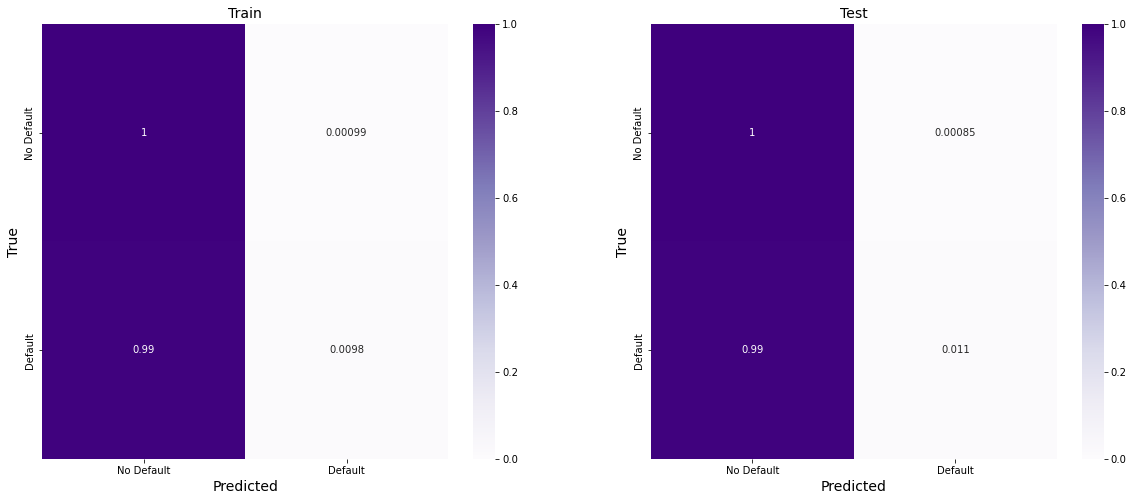

In [71]:
confusion_matrix_def(model,X_train,y_train,X_test,y_test)

In [72]:
# Creating Subsets to avoid overfitting
splits = 3

# Train Test split percentage
subsample_rate = 0.3

finaldf = np.array_split(train_dataset, splits)
X_train = finaldf[0][selected_features]
y_train = finaldf[0]['TARGET']
X_kaggle_test= X_kaggle_test[selected_features]

## split part of data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (60989, 38)
X validation      shape: (10763, 38)
X test            shape: (30752, 38)
X X_kaggle_test   shape: (48744, 38)


In [73]:
cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Using Cross Validation 
logit_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits)               
logit_score_train = pct(logit_scores.mean())

logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)


In [74]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [logit_score_train, 
                pct(accuracy_score(y_valid, model.predict(X_valid))),
                pct(accuracy_score(y_test, model.predict(X_test))),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [f"Logistic Regression with 30% data {tot_features}"]
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_38_features     91.921     91.935     91.934     0.7442   
1  Baseline_38_features     91.894     91.907     91.848     0.7453   

   Valid AUC  Test  AUC  Train F1 Score  Test F1 Score  Train Log Loss  \
0     0.7368     0.7452          0.0192         0.0208          2.7921   
1     0.7364     0.7369          0.0233         0.0203          2.8055   

   Test Log Loss  P Score                                        Description  
0         2.7858      0.0         Logistic Regression 38:   Num:31,    Cat:7  
1         2.8157      0.0  Logistic Regression with 30% data 38:   Num:31...

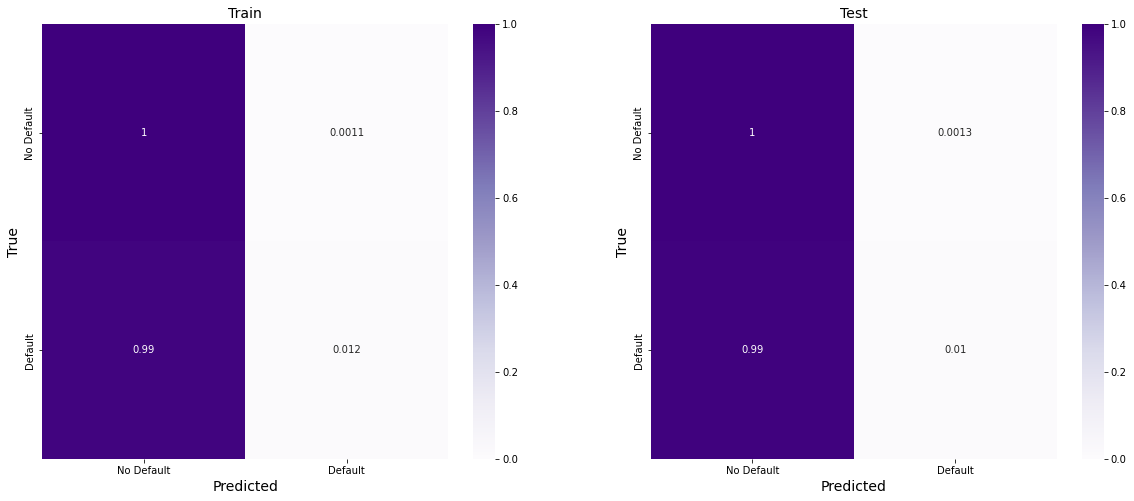

In [75]:
confusion_matrix_def(model,X_train,y_train,X_test,y_test)

In [76]:
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("forest", RandomForestClassifier())
    ])

In [77]:
cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Using Cross Validation 
forest_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits)               
forest_score_train = pct(forest_scores.mean())

forest_score_test  = full_pipeline_with_predictor.score(X_test, y_test)

In [78]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [forest_score_train, 
                pct(accuracy_score(y_valid, model.predict(X_valid))),
                pct(accuracy_score(y_test, model.predict(X_test))),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [f"Random Forest Classifier with 30% data {tot_features}"]
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_38_features     91.921     91.935     91.934     0.7442   
1  Baseline_38_features     91.894     91.907     91.848     0.7453   
2  Baseline_38_features     91.911     91.926     91.883     1.0000   

   Valid AUC  Test  AUC  Train F1 Score  Test F1 Score  Train Log Loss  \
0     0.7368     0.7452          0.0192         0.0208          2.7921   
1     0.7364     0.7369          0.0233         0.0203          2.8055   
2     0.7133     0.7168          0.9999         0.0072          0.0006   

   Test Log Loss  P Score                                        Description  
0         2.7858      0.0         Logistic Regression 38:   Num:31,    Cat:7  
1         2.8157      0.0  Logistic Regression with 30% data 38:   Num:31...  
2         2.8034      0.0  Random Forest Classifier with 30% data 38:   N...

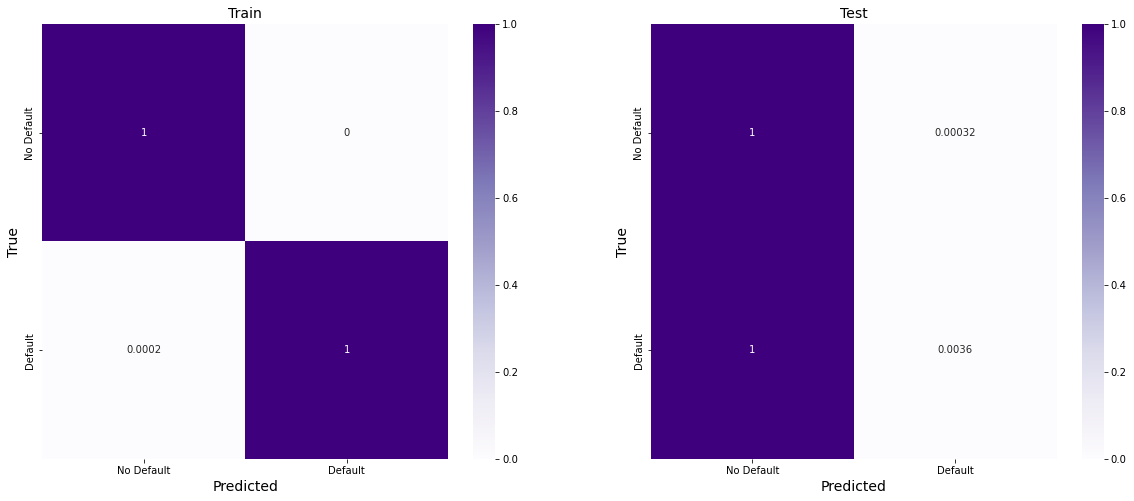

In [79]:
confusion_matrix_def(model,X_train,y_train,X_test,y_test)

In [80]:
# np.random.seed(42)
# full_pipeline_with_predictor = Pipeline([
#         ("preparation", data_prep_pipeline),
#         ("svc", SVC())
#     ])

In [81]:
# cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

# model = full_pipeline_with_predictor.fit(X_train, y_train)
# np.random.seed(42)

# # Using Cross Validation 
# svc_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits)               
# svc_score_train = pct(svc_scores.mean())

# svc_score_test  = full_pipeline_with_predictor.score(X_test, y_test)

In [82]:
# exp_name = f"Baseline_{len(selected_features)}_features"
# expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
#                [svc_score_train, 
#                 pct(accuracy_score(y_valid, model.predict(X_valid))),
#                 pct(accuracy_score(y_test, model.predict(X_test))),
#                 roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
#                 roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
#                 roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
#                 f1_score(y_train, model.predict(X_train)),
#                 f1_score(y_test, model.predict(X_test)),
#                 log_loss(y_train, model.predict(X_train)),
#                 log_loss(y_test, model.predict(X_test)),0 ],4)) \
#                 + [f"Support Vector Classifier with 30% data {tot_features}"]
# expLog

In [83]:
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("dec", DecisionTreeClassifier())
    ])

In [84]:
cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Using Cross Validation 
dec_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits)               
dec_score_train = pct(dec_scores.mean())

dec_score_test  = full_pipeline_with_predictor.score(X_test, y_test)

In [85]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [dec_score_train, 
                pct(accuracy_score(y_valid, model.predict(X_valid))),
                pct(accuracy_score(y_test, model.predict(X_test))),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [f"Decision Tree Classifier with 30% data {tot_features}"]
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_38_features     91.921     91.935     91.934     0.7442   
1  Baseline_38_features     91.894     91.907     91.848     0.7453   
2  Baseline_38_features     91.911     91.926     91.883     1.0000   
3  Baseline_38_features     85.113     85.645     85.409     1.0000   

   Valid AUC  Test  AUC  Train F1 Score  Test F1 Score  Train Log Loss  \
0     0.7368     0.7452          0.0192         0.0208          2.7921   
1     0.7364     0.7369          0.0233         0.0203          2.8055   
2     0.7133     0.7168          0.9999         0.0072          0.0006   
3     0.5380     0.5342          1.0000         0.1448          0.0000   

   Test Log Loss  P Score                                        Description  
0         2.7858      0.0         Logistic Regression 38:   Num:31,    Cat:7  
1         2.8157      0.0  Logistic Regression with 30% data 38:   Num:31...  
2         2.8034      0.0  Random Forest Classifier with 30% data 38:   N...  
3         5.0396      0.0  Decision Tree Classifier with 30% data 38:   N...

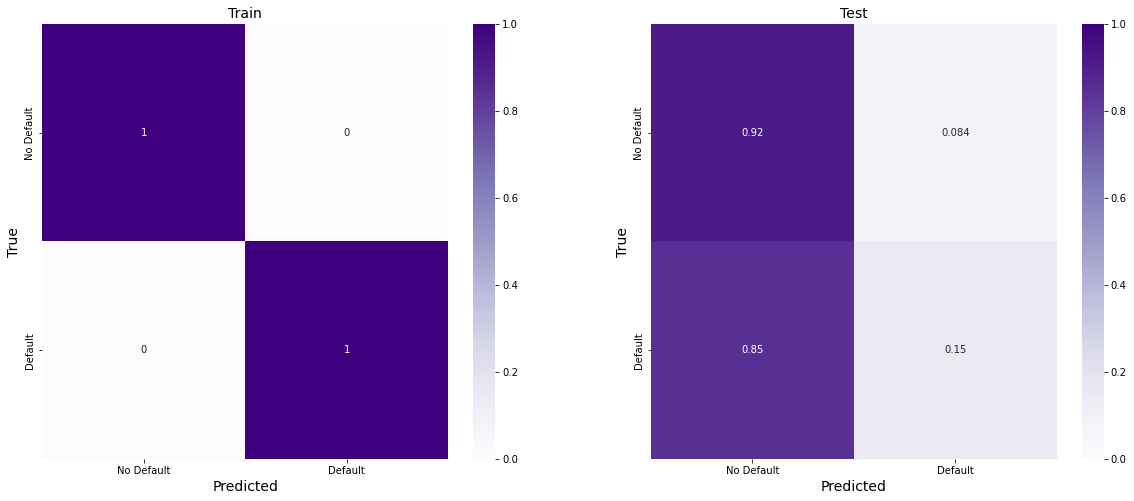

In [86]:
confusion_matrix_def(model,X_train,y_train,X_test,y_test)

In [87]:
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("xgb", xgb.XGBClassifier())
    ])

In [88]:
cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Using Cross Validation 
xgb_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits)               
xgb_score_train = pct(xgb_scores.mean())

xgb_score_test  = full_pipeline_with_predictor.score(X_test, y_test)

[00:13:06] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:10] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:13] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:16] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

In [89]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [xgb_score_train, 
                pct(accuracy_score(y_valid, model.predict(X_valid))),
                pct(accuracy_score(y_test, model.predict(X_test))),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [f"XGBoost Classifier with 30% data {tot_features}"]
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_38_features     91.921     91.935     91.934     0.7442   
1  Baseline_38_features     91.894     91.907     91.848     0.7453   
2  Baseline_38_features     91.911     91.926     91.883     1.0000   
3  Baseline_38_features     85.113     85.645     85.409     1.0000   
4  Baseline_38_features     91.705     91.768     91.740     0.9230   

   Valid AUC  Test  AUC  Train F1 Score  Test F1 Score  Train Log Loss  \
0     0.7368     0.7452          0.0192         0.0208          2.7921   
1     0.7364     0.7369          0.0233         0.0203          2.8055   
2     0.7133     0.7168          0.9999         0.0072          0.0006   
3     0.5380     0.5342          1.0000         0.1448          0.0000   
4     0.7234     0.7245          0.3135         0.0737          2.2992   

   Test Log Loss  P Score                                        Description  
0         2.7858      0.0         Logistic Regression 38:   Num:31,    Cat:7  
1         2.8157      0.0  Logistic Regression with 30% data 38:   Num:31...  
2         2.8034      0.0  Random Forest Classifier with 30% data 38:   N...  
3         5.0396      0.0  Decision Tree Classifier with 30% data 38:   N...  
4         2.8528      0.0  XGBoost Classifier with 30% data 38:   Num:31,...

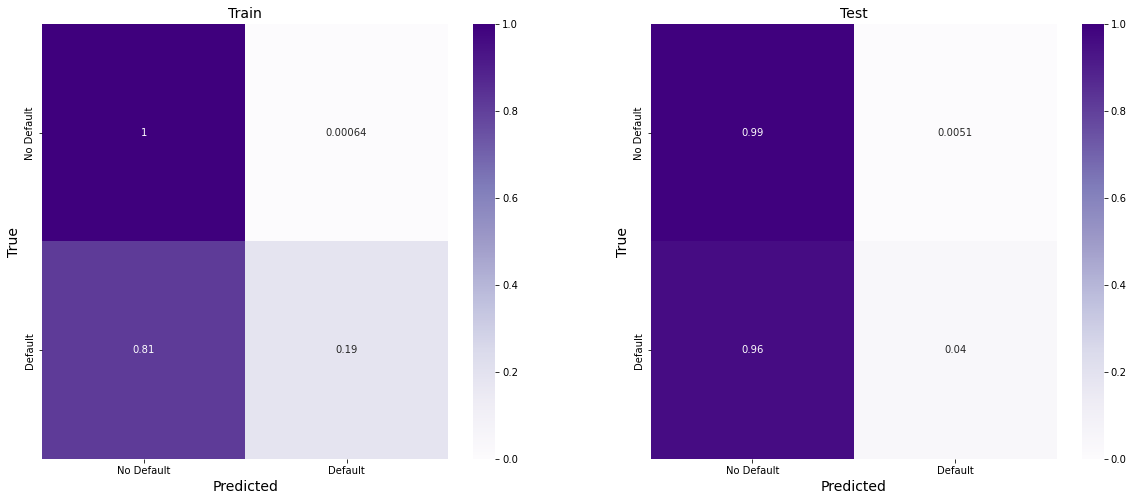

In [90]:
confusion_matrix_def(model,X_train,y_train,X_test,y_test)

In [91]:
# np.random.seed(42)
# full_pipeline_with_predictor = Pipeline([
#         ("preparation", data_prep_pipeline),
#         ("knn", KNeighborsClassifier())
#     ])

In [92]:
# cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

# model = full_pipeline_with_predictor.fit(X_train, y_train)
# np.random.seed(42)

# # Using Cross Validation 
# knn_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits, n_jobs=-1)               
# knn_score_train = pct(knn_scores.mean())

# knn_score_test  = full_pipeline_with_predictor.score(X_test, y_test)

In [93]:
# exp_name = f"Baseline_{len(selected_features)}_features"
# expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
#                [knn_score_train, 
#                 pct(accuracy_score(y_valid, model.predict(X_valid))),
#                 pct(accuracy_score(y_test, model.predict(X_test))),
#                 roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
#                 roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
#                 roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
#                 f1_score(y_train, model.predict(X_train)),
#                 f1_score(y_test, model.predict(X_test)),
#                 log_loss(y_train, model.predict(X_train)),
#                 log_loss(y_test, model.predict(X_test)),0 ],4)) \
#                 + [f"XGBoost Classifier with 30% data {tot_features}"]
# expLog

In [94]:
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("nb", GaussianNB())
    ])

In [95]:
cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Using Cross Validation 
nb_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits, n_jobs=-1)               
nb_score_train = pct(nb_scores.mean())

nb_score_test  = full_pipeline_with_predictor.score(X_test, y_test)

In [96]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [nb_score_train, 
                pct(accuracy_score(y_valid, model.predict(X_valid))),
                pct(accuracy_score(y_test, model.predict(X_test))),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [f"Gaussian NB Classifier with 30% data {tot_features}"]
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_38_features     91.921     91.935     91.934     0.7442   
1  Baseline_38_features     91.894     91.907     91.848     0.7453   
2  Baseline_38_features     91.911     91.926     91.883     1.0000   
3  Baseline_38_features     85.113     85.645     85.409     1.0000   
4  Baseline_38_features     91.705     91.768     91.740     0.9230   
5  Baseline_38_features     12.822     11.595     11.580     0.6632   

   Valid AUC  Test  AUC  Train F1 Score  Test F1 Score  Train Log Loss  \
0     0.7368     0.7452          0.0192         0.0208          2.7921   
1     0.7364     0.7369          0.0233         0.0203          2.8055   
2     0.7133     0.7168          0.9999         0.0072          0.0006   
3     0.5380     0.5342          1.0000         0.1448          0.0000   
4     0.7234     0.7245          0.3135         0.0737          2.2992   
5     0.6639     0.6516          0.1535         0.1526         30.4864   

   Test Log Loss  P Score                                        Description  
0         2.7858      0.0         Logistic Regression 38:   Num:31,    Cat:7  
1         2.8157      0.0  Logistic Regression with 30% data 38:   Num:31...  
2         2.8034      0.0  Random Forest Classifier with 30% data 38:   N...  
3         5.0396      0.0  Decision Tree Classifier with 30% data 38:   N...  
4         2.8528      0.0  XGBoost Classifier with 30% data 38:   Num:31,...  
5        30.5400      0.0  Gaussian NB Classifier with 30% data 38:   Num...

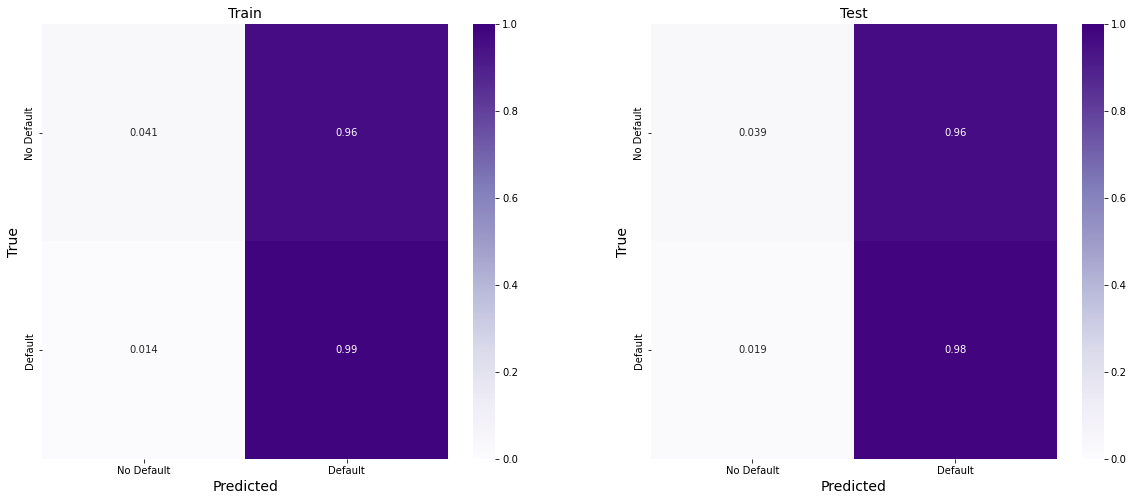

In [97]:
confusion_matrix_def(model,X_train,y_train,X_test,y_test)

In [1]:
import math
import latexify

In [2]:
@latexify.function
def accuracy(TP, TN, FP, FN):
    return (TP + TN)/(TP + FP + TN + FN)

accuracy

In [3]:
@latexify.function
def Precision():
    return TruePositives / (TruePostives + FalsePostives) 

Precision

In [4]:
@latexify.function
def Recall():
    return TruePositives / (TruePostives + FalseNegatives) 

Recall

In [5]:
#false positive fraction
@latexify.function
def falsePositiveFraction():
    return FP/(FP + TN)

falsePositiveFraction

In [6]:
#true positive fraction
@latexify.function
def truePositiveFraction():
    return TP/(TP + FN)

truePositiveFraction

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])


In [ ]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [ ]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
test_class_scores[0:10]

In [ ]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

In [ ]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [ ]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

In [99]:
# df = pd.read_csv('/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2/DATA_DIR/application_test.csv')

# temp_df = pd.DataFrame()
# temp_df = full_pipeline_with_predictor.predict(df)
# print(temp_df)
# n_zeros = np.count_nonzero(temp_df==0)
# print(n_zeros)
# n_ones = np.count_nonzero(temp_df==1)
# print(n_ones)

In [101]:
# df['TARGET'] = temp_df.tolist()
# # DF = pd.DataFrame({'TARGET' : temp_df})
# # print(DF)

# # Frames = [df,DF]
# # result = pd.concat(Frames)
# result1 = df[['SK_ID_CURR','TARGET']]
# result1.to_csv('Group3.csv',index = False)
# #np.savetxt('data.csv', temp_df, delimiter=',')

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 

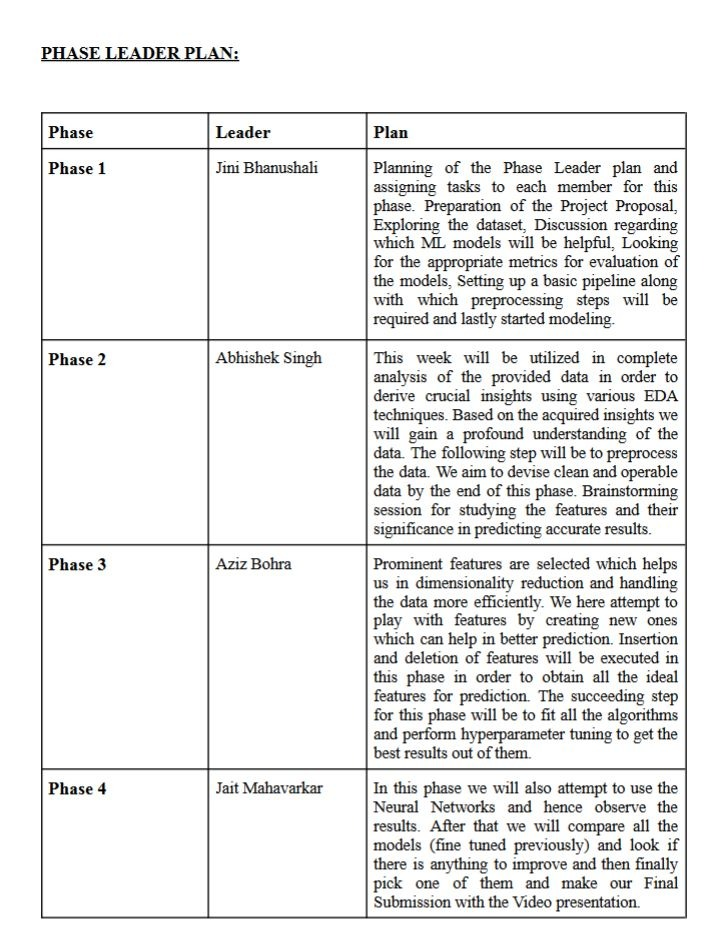

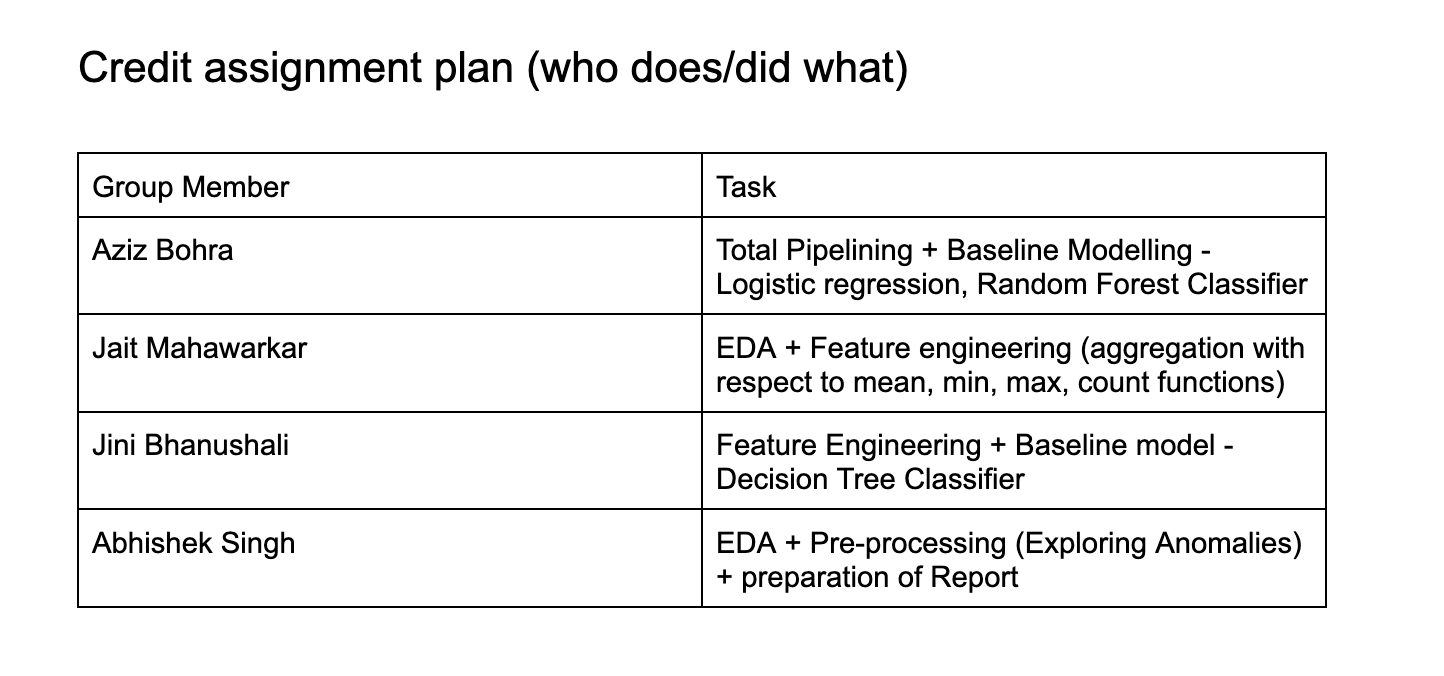


## Abstract
For any financial institution, determining whether the borrower is capable of repayment given a principal, maturity, and schedule is a crucial step in the loan-issuing process. In this project, we want to create a machine learning model that can predict behavior and repayment capacity based on a variety of specified parameters. The "Home Credit Default Risk" dataset is being used. The application, demographic, and history credit behavior data for various entries make up the bulk of this dataset. In the beginning stages of this project, we will analyze with a baseline pipeline and selected metrics while performing basic EDA on the datasets provided.
We intend to keep an eye out for any anomalies, missing data, and/or unusual data throughout EDA. To develop the following collection of pipelines, we intend to perform thorough statistical analysis on all submitted datasets for numerical, categorical variables. A lot of machine learning models should also be put to the test before being compared and contrasted to uncover their individual strengths. Additionally, using GridSearchCV, estimate each model's ideal parameters, then assess. Our objective is to develop an effective model that is adequately optimized to accurately assess risk and categorize clients as Defaulters or PreMaturers. The metrics Accuracy, Precision, Recall, F1 Score, and Confusion Matrix are among those we plan to report.

Results on the experiments performed:

Logistic Regression: 73.64%

Random Forest: 71.33%

Decision Tree: 53.80%

## Introduction
Home Credit Default Risk, a company that offers credit lines to unbanked persons, distributes Home Credit as a dataset (loans). application.csv: By partitioning the dataset, we are using this as the main source of data for home credit for both training and testing purposes. Information on loans and loan applicants at the time of application is also included in this file. This file, called bureau.csv, contains details about clients' loan histories from financial institutions that have been reported to the Credit Bureau. The information concerning the specific client's loan is contained in each row of this file. And this file contains data about a large number of clients. bureau balance.csv: This file contains information on the monthly balances of the client's early credits that the credit bureau has been keeping track of.previous_application.csv: This file includes details regarding the applicant's prior Home Credit loans, the criteria that were taken into account while approving those loans in the past, and information about the customer at the time the loan was granted to him. POS CASH balance.csv: This file contains all of the client's information, including monthly balances (snapshots) of their previous point of sale (POS) transactions as well as details on the cash loans they obtained from Home Credit. installments payments.csv: This file contains details on clients' prior installment payments for each loan received from the Home Credit that is linked to the loan in our sample. credit card balance.csv: This file contains details on the past monthly balances (snapshots) of clients' Home Credit credit card histories. installments payments.csv: This file contains details on clients' prior installment payments for each loan received from the Home Credit that is linked to the loan in our sample. credit card balance.csv: This file contains details on the past monthly balances (snapshots) of clients' Home Credit credit card histories.

## Feature Engineering and transformers
After preprocessing the data, we moved to feature engineering. For Phase 2, we found the correlated numerical features between all the datasets and target using mean, min, max, sum and count aggregate function. 
Then there were many missing numerical values in all the dataset so using SimpleImputer we replaced them by ‘mean’ of that particular column. And same for the categorical data, they were replaced by ‘most frequent words’ in that column.

## Pipelines
Pipeline is created to prevent leakage and loss of data over the entire process.
Here we have created a pipeline data_prep which further gas two pipelines cat and num.

num_pipeline: This pipeline consists of 3 steps (for Numerical Data)

    Selector : Selecting numerical data from the dataset
    Imputer: The numerical null values are replaced by the mean of the column.
    Std_Scaler: All the numerical values are scaled to equivalent scale for better computation.

cat_pipeline: This pipeline consists of 3 steps (for Categorical Data)

    Selector: Selecting categorical data from the dataset
    Imputer: The categorical null values are replaced by the most frequently occurring values.
    One hot Encoder: Encodes data into binary notation.


This way both the pipelines are appended into one.

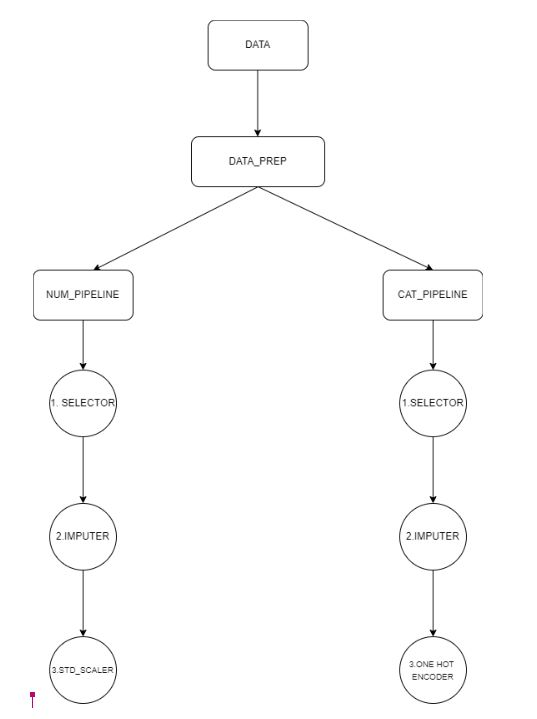


Further on, for every model we have created a predictor pipeline. This is the most important pipeline of our project. This predictor pipeline consists of data_prep_pipeline which we had created above and baseline model. 




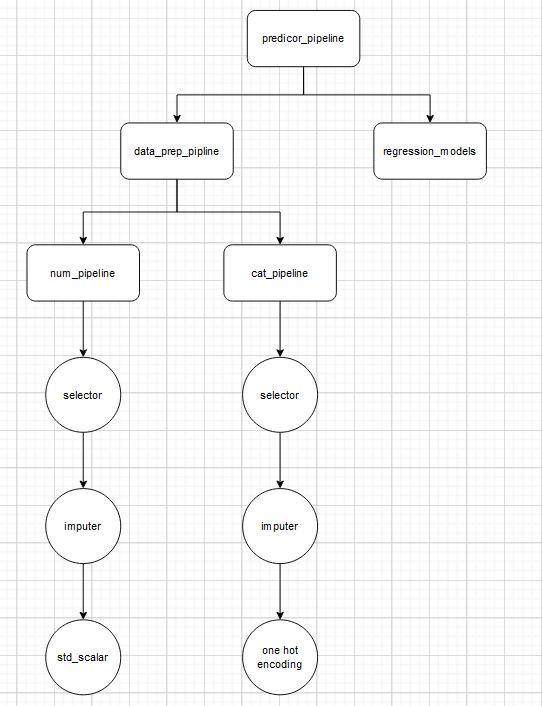

## BaseLine Model

In this phase we experimented with 3 models, Logistic Regression, Random Forest Classifier and Decision Tree Classifier. In these experiments we used 30% of the data to implement these models. For the Logistic regression model , we achieved an accuracy of 91.91% whereas the AUC accuracy was 73.64%. For the Random Forest Classifier, the accuracy of this model was 91.93% and its AUC accuracy was 71.33%. And for the last model that we implemented for this phase, Decision Tree Classifier, had an accuracy of 85.65% and its AUC accuracy was 53.8%

Another thing to consider was the dataset used was an imbalanced dataset where the distribution of TARGET=0 was way greater than TARGET=1. So the results we are getting here might seem to have good accuracy, but we need to make sure that they are the same with a balanced distribution. We also observed that even after splitting the data, it didn’t help us much because a couple algorithms were still overfitting.

## Experimental results

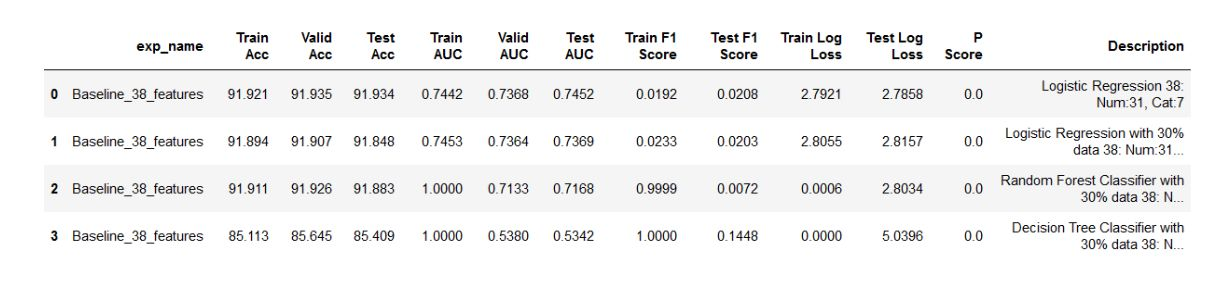

## Discussion
For this phase Logistic regression was the best model which provided a training accuracy of 91.89% and kaggle accuracy of 50%. So to solve this problem we intend to improve by doing feature engineering of EXT_SOURCE and perform hyperparameter tuning. We also intend to use other regression model to achieve more accuracy.


## Conclusion
Our main goal for this phase was to understand the data, we did data cleaning and selected characteristics that were required for prediction. We experimented with 3 models in this phase and among them Logistic regression had the best accuracy 91.89% and AUC accuracy of 73.64%.  Though we did face some issues in this phase like feature extraction of external source features which is very important data for these experiments, dealing with overfitting and underfitting of models, implementing SVM classifier model. So to overcome these problems, in the next phase we start with feature extraction of external features, then hyperparameter tuning the models to increase along with using more regression models. 

## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

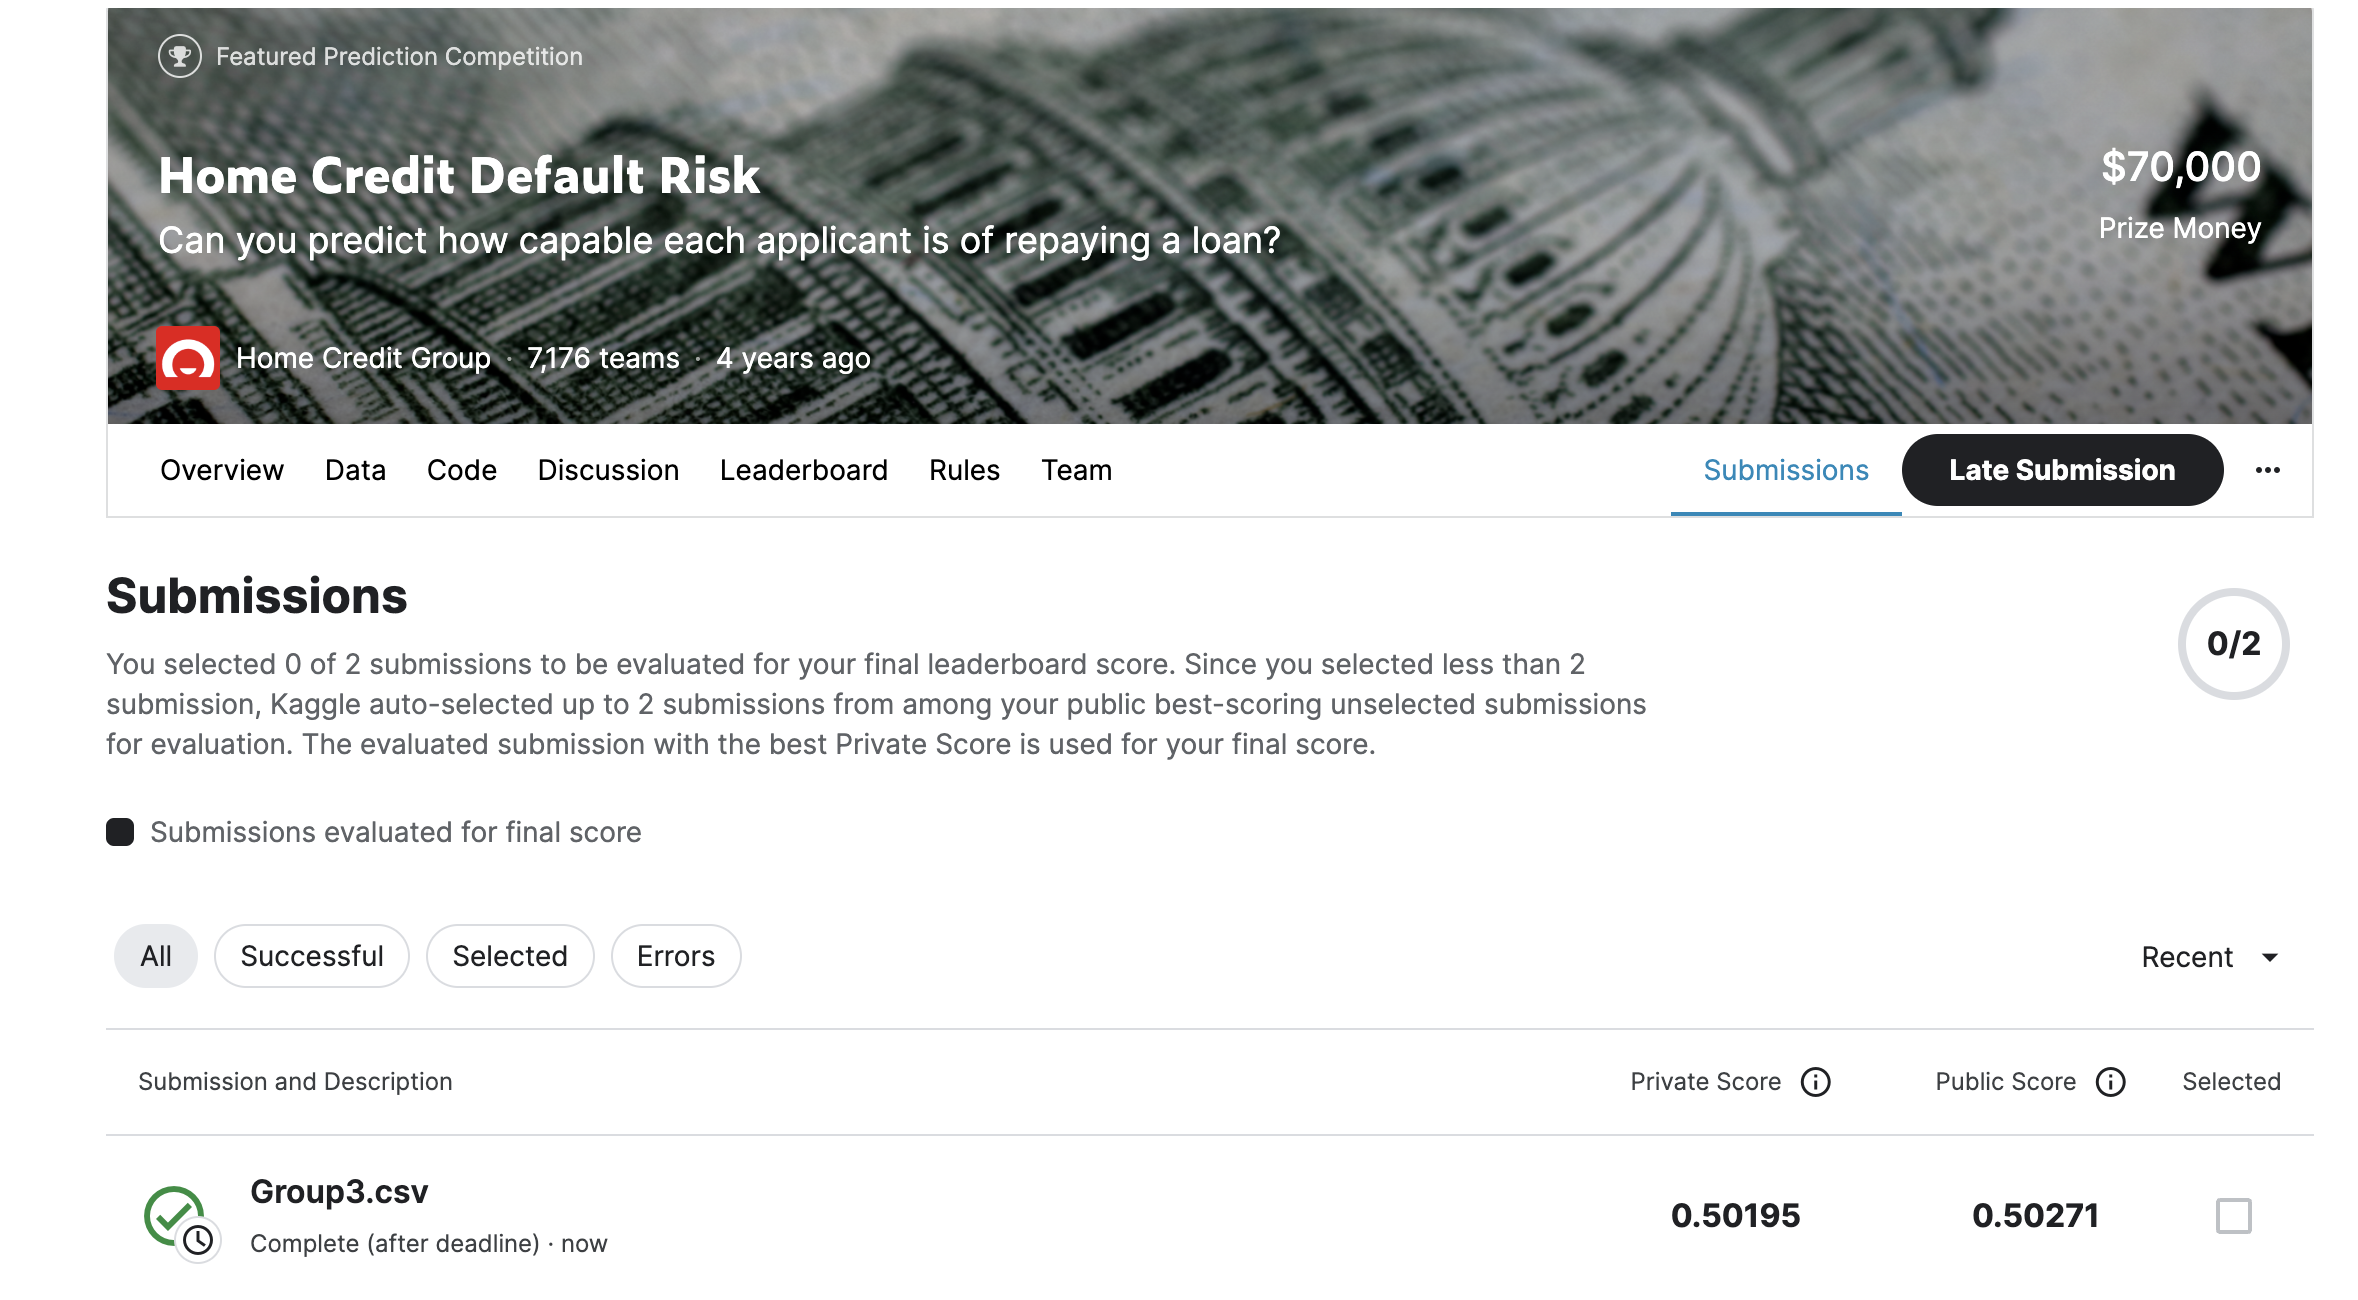

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/

https://www.kaggle.com/c/home-credit-default-risk/data

https://www.kaggle.com/competitions/home-credit-default-risk/code

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/